# Data Science Capstone: Sleep & Health Intelligence System

**Student Name:** Hisbullah Ajadi  
**Student ID:** ALT/SOD/TIN/025/0098  
**Course:** AltSchool Africa Data Science - First Semester  
**Date:** 8th February 2025
**Project GitHub Repository:** https://github.com/hisbullah100/altschool-sleep-health-project (This repository contains the full, reproducible Jupyter Notebook used for data cleaning, analysis, visualization, and interpretation, and the original dataset used for the project).

---

## Executive Summary

This notebook presents a comprehensive analysis of sleep and lifestyle patterns using real-world health data. The project investigates how lifestyle factors (physical activity, stress, occupation) relate to physiological health indicators (BMI, blood pressure, heart rate) and sleep outcomes.

### Key Objectives:
1. Assess data quality and perform necessary transformations.
2. Discover patterns between lifestyle factors and sleep health.
3. Provide actionable recommendations for individuals, employers, and health professionals.

### Dataset:
Sleep Health and Lifestyle Dataset - containing information on sleep duration, quality, physical activity, stress levels, BMI, blood pressure, heart rate, and occupational data.

---

## Section A: Environment Setup.

### Required Libraries:
I import the following libraries for data analysis and visualization:
- **pandas**: Data manipulation and analysis.
- **numpy**: Numerical operations and statistical functions.
- **matplotlib & seaborn**: Data visualization.
- **warnings**: Suppress unnecessary warnings for cleaner output.

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings to suppress unnecessary messages
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility using last 3 digits of Student ID
RANDOM_STATE = 98  # Last 3 digits: 098

# Configure visualization settings for better readability
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")
print(f"✓ Random state set to: {RANDOM_STATE}")

✓ Libraries imported successfully
✓ Random state set to: 98


---

## Section B: Data Readiness & Feature Logic.

### Part 1: Initial Data Loading.

I begin by loading the sleep health dataset and performing an initial inspection to understand:
- Dataset dimensions (rows and columns).
- Column names and data types.
- Sample records.
- Basic statistical summaries.

In [2]:
# Load the sleep health dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display basic information about the dataset
print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)

print(f"\n✓ Dataset loaded successfully")
print(f"✓ Total records: {df.shape[0]}")
print(f"✓ Total features: {df.shape[1]}")

print("\n" + "=" * 70)
print("COLUMN NAMES AND DATA TYPES")
print("=" * 70)
print(df.dtypes)

print("\n" + "=" * 70)
print("FIRST 5 RECORDS")
print("=" * 70)
df.head()

DATASET OVERVIEW

✓ Dataset loaded successfully
✓ Total records: 374
✓ Total features: 13

COLUMN NAMES AND DATA TYPES
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

FIRST 5 RECORDS


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Part 2: Data Quality Assessment.

Before proceeding with analysis, I must ensure data integrity, so I will check for:
1. **Missing values** - Incomplete records that could bias analysis.
2. **Duplicate records** - The same person counted multiple times.
3. **Data type consistency** - Ensuring numerical and categorical variables are correctly typed.
4. **Outliers or extreme values** - Unrealistic measurements that could distort findings.
5. **Inconsistent labels** - Variations in categorical values (e.g., "Male" vs "male").

**Rationale:** Clean data is essential for reliable insights. Any data quality issues must be identified and resolved before analysis.

In [3]:
# Check for missing values in each column
# Missing data can indicate incomplete records or data collection issues
print("=" * 70)
print("MISSING VALUE ANALYSIS")
print("=" * 70)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary dataframe
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Display only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

if len(missing_summary) > 0:
    print("\n⚠ Columns with missing values:")
    print(missing_summary.to_string(index=False))
else:
    print("\n✓ No missing values detected in the dataset")

print("\n" + "=" * 70)

MISSING VALUE ANALYSIS

⚠ Columns with missing values:
        Column  Missing Count  Missing Percentage
Sleep Disorder            219            58.55615



In [4]:
# Check for duplicate records based on Person ID
# Duplicates could indicate data entry errors or the same person recorded multiple times
print("=" * 70)
print("DUPLICATE RECORD ANALYSIS")
print("=" * 70)

# Check for duplicate Person IDs
duplicate_ids = df['Person ID'].duplicated().sum()

if duplicate_ids > 0:
    print(f"\n⚠ Found {duplicate_ids} duplicate Person IDs")
    print("\nDuplicate records:")
    print(df[df['Person ID'].duplicated(keep=False)].sort_values('Person ID'))
else:
    print("\n✓ No duplicate Person IDs found")

# Check for completely duplicate rows (all columns identical)
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"\n⚠ Found {duplicate_rows} completely duplicate rows")
else:
    print("\n✓ No completely duplicate rows found")

print("\n" + "=" * 70)

DUPLICATE RECORD ANALYSIS

✓ No duplicate Person IDs found

✓ No completely duplicate rows found



In [5]:
# Inspect data types and verify they match expected formats
# Incorrect data types can cause errors in numerical calculations or grouping
print("=" * 70)
print("DATA TYPE VERIFICATION")
print("=" * 70)

print("\nCurrent data types:")
print(df.dtypes)

# Display basic statistics for numerical columns
print("\n" + "=" * 70)
print("NUMERICAL COLUMNS - BASIC STATISTICS")
print("=" * 70)
print(df.describe())

DATA TYPE VERIFICATION

Current data types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

NUMERICAL COLUMNS - BASIC STATISTICS
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000  

In [6]:
# Examine unique values in categorical columns to identify inconsistencies
# Variations in spelling or case (e.g., "Male" vs "male") can fragment analysis
print("=" * 70)
print("CATEGORICAL VARIABLES INSPECTION")
print("=" * 70)

categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Values: {df[col].unique()}")
        print(f"  Value counts:")
        print(df[col].value_counts())
        print("-" * 70)

CATEGORICAL VARIABLES INSPECTION

Gender:
  Unique values: 2
  Values: ['Male' 'Female']
  Value counts:
Gender
Male      189
Female    185
Name: count, dtype: int64
----------------------------------------------------------------------

Occupation:
  Unique values: 11
  Values: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
  Value counts:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
----------------------------------------------------------------------

BMI Category:
  Unique values: 4
  Values: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
  Value counts:
BMI Category
Normal           195
Overweight     

In [7]:
# Identify potential outliers or unrealistic values in key health metrics
# Extreme values could indicate measurement errors or data entry mistakes
print("=" * 70)
print("EXTREME VALUE DETECTION")
print("=" * 70)

# Define expected ranges for health metrics
health_ranges = {
    'Age': (18, 100),
    'Sleep Duration': (2, 12),
    'Quality of Sleep': (1, 10),
    'Physical Activity Level': (0, 100),
    'Stress Level': (1, 10),
    'Heart Rate': (40, 120),
    'Daily Steps': (0, 30000)
}

print("\nChecking for values outside expected ranges:")

for column, (min_val, max_val) in health_ranges.items():
    if column in df.columns:
        # Find values outside expected range
        outliers = df[(df[column] < min_val) | (df[column] > max_val)]
        
        if len(outliers) > 0:
            print(f"\n⚠ {column}: Found {len(outliers)} values outside range [{min_val}, {max_val}]")
            print(f"  Min: {df[column].min()}, Max: {df[column].max()}")
        else:
            print(f"\n✓ {column}: All values within expected range [{min_val}, {max_val}]")

print("\n" + "=" * 70)

EXTREME VALUE DETECTION

Checking for values outside expected ranges:

✓ Age: All values within expected range [18, 100]

✓ Sleep Duration: All values within expected range [2, 12]

✓ Quality of Sleep: All values within expected range [1, 10]

✓ Physical Activity Level: All values within expected range [0, 100]

✓ Stress Level: All values within expected range [1, 10]

✓ Heart Rate: All values within expected range [40, 120]

✓ Daily Steps: All values within expected range [0, 30000]



In [8]:
# Inspect Blood Pressure column format
# Blood Pressure is typically stored as "Systolic/Diastolic" (e.g., "120/80")
# I need to verify the format is consistent before splitting it into separate features
print("=" * 70)
print("BLOOD PRESSURE FORMAT INSPECTION")
print("=" * 70)

if 'Blood Pressure' in df.columns:
    print("\nSample Blood Pressure values:")
    print(df['Blood Pressure'].head(10))
    
    print(f"\nUnique Blood Pressure values: {df['Blood Pressure'].nunique()}")
    print("\nValue distribution:")
    print(df['Blood Pressure'].value_counts().head(10))
else:
    print("\n⚠ Blood Pressure column not found")

print("\n" + "=" * 70)

BLOOD PRESSURE FORMAT INSPECTION

Sample Blood Pressure values:
0    126/83
1    125/80
2    125/80
3    140/90
4    140/90
5    140/90
6    140/90
7    120/80
8    120/80
9    120/80
Name: Blood Pressure, dtype: object

Unique Blood Pressure values: 25

Value distribution:
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
Name: count, dtype: int64



---

### Part 3: Data Cleaning & Preparation.

Based on the quality assessment, I will perform the following cleaning operations:

**Issue 1: Missing values in Sleep Disorder (219 records, 58.4%)**
- **Analysis:** These "missing" values likely represent individuals with NO sleep disorder.
- **Action:** I will fill missing values with "None" to explicitly indicate absence of sleep disorder.
- **Rationale:** This is standard practice in medical datasets where absence of a condition is meaningful information.

**Issue 2: Blood Pressure format**
- **Current format:** "Systolic/Diastolic" (e.g., "126/83").
- **Action:** I will split into two separate numerical columns: Systolic BP and Diastolic BP.
- **Rationale:** Enables numerical analysis and creation of blood pressure categories (Normal, Elevated, High).


### Part 4: Other Note-Worthy Comments
Based on the inspection above, we will document any data quality issues found and the actions taken to resolve them.

- **Duplicates**: There were no duplicates in the records.
- **Inconsistent formatting**: Absent.
- **Extreme values**: All values within expected ranges.

---

In [9]:
# Fill missing Sleep Disorder values with "None"
# This explicitly indicates individuals without a diagnosed sleep disorder
# Rationale: In medical data, absence of a condition is meaningful information

print("=" * 70)
print("HANDLING MISSING SLEEP DISORDER VALUES")
print("=" * 70)

# Check missing values before
print(f"\nMissing values before: {df['Sleep Disorder'].isnull().sum()}")

# Fill missing values with "None"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Check missing values after
print(f"Missing values after: {df['Sleep Disorder'].isnull().sum()}")

# Display updated value counts
print("\nUpdated Sleep Disorder distribution:")
print(df['Sleep Disorder'].value_counts())

print("\n✓ Sleep Disorder missing values handled successfully")
print("=" * 70)

HANDLING MISSING SLEEP DISORDER VALUES

Missing values before: 219
Missing values after: 0

Updated Sleep Disorder distribution:
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

✓ Sleep Disorder missing values handled successfully


In [10]:
# Split Blood Pressure into Systolic and Diastolic components
# Format: "Systolic/Diastolic" (e.g., "126/83")
# Rationale: Separate values enable numerical analysis and categorization

print("=" * 70)
print("SPLITTING BLOOD PRESSURE INTO COMPONENTS")
print("=" * 70)

# Split the Blood Pressure column
# str.split('/') separates "126/83" into ["126", "83"]
# expand=True creates two separate columns
bp_split = df['Blood Pressure'].str.split('/', expand=True)

# Convert to integers and create new columns
df['Systolic BP'] = bp_split[0].astype(int)
df['Diastolic BP'] = bp_split[1].astype(int)

# Verify the split
print("\nOriginal Blood Pressure vs New Columns:")
print(df[['Blood Pressure', 'Systolic BP', 'Diastolic BP']].head(10))

# Display statistics for new columns
print("\nSystolic BP statistics:")
print(df['Systolic BP'].describe())

print("\nDiastolic BP statistics:")
print(df['Diastolic BP'].describe())

print("\n✓ Blood Pressure split successfully")
print("=" * 70)

SPLITTING BLOOD PRESSURE INTO COMPONENTS

Original Blood Pressure vs New Columns:
  Blood Pressure  Systolic BP  Diastolic BP
0         126/83          126            83
1         125/80          125            80
2         125/80          125            80
3         140/90          140            90
4         140/90          140            90
5         140/90          140            90
6         140/90          140            90
7         120/80          120            80
8         120/80          120            80
9         120/80          120            80

Systolic BP statistics:
count    374.000000
mean     128.553476
std        7.748118
min      115.000000
25%      125.000000
50%      130.000000
75%      135.000000
max      142.000000
Name: Systolic BP, dtype: float64

Diastolic BP statistics:
count    374.000000
mean      84.649733
std        6.161611
min       75.000000
25%       80.000000
50%       85.000000
75%       90.000000
max       95.000000
Name: Diastolic BP, dtype: fl

---

### Part 5: Feature Engineering.

To support meaningful analysis of sleep health patterns, I will create several derived features that group continuous variables into clinically relevant categories.

**New Features to Create:**

1. **Sleep Quality Category**
   - Groups: Poor (1-4), Fair (5-6), Good (7-8), Excellent (9-10).
   - Rationale: Enables analysis of sleep quality patterns and comparisons across groups.

2. **Sleep Duration Category**
   - Groups: Insufficient (<7h), Adequate (7-9h), Excessive (>9h).
   - Rationale: Based on CDC recommendations for adult sleep duration.

3. **Physical Activity Category**
   - Groups: Low (<30), Moderate (30-60), High (>60).
   - Rationale: Standard activity level classifications for health analysis.

4. **Daily Steps Category**
   - Groups: Sedentary (<5000), Lightly Active (5000-7499), Moderately Active (7500-9999), Active (≥10000).
   - Rationale: Based on established step count health benchmarks.

5. **Blood Pressure Category**
   - Groups: Normal, Elevated, High (Stage 1), High (Stage 2).
   - Rationale: Follows American Heart Association guidelines for BP classification.

6. **Age Group**
   - Groups: Young Adult (27-35), Middle Age (36-50), Older Adult (51-59).
   - Rationale: Enables age-based comparisons in sleep and health patterns.

**Why These Features Matter:**
These categories transform continuous measurements into interpretable health classifications, enabling us to identify risk groups and provide actionable recommendations.

---

In [11]:
# Create Sleep Quality Categories based on quality scores
# Categories align with common sleep quality assessment scales

print("=" * 70)
print("CREATING SLEEP QUALITY CATEGORIES")
print("=" * 70)

def categorize_sleep_quality(quality):
    """
    Categorize sleep quality score into descriptive groups
    
    Parameters:
    quality (int): Sleep quality score (1-10)
    
    Returns:
    str: Category label
    """
    if quality <= 4:
        return 'Poor'
    elif quality <= 6:
        return 'Fair'
    elif quality <= 8:
        return 'Good'
    else:
        return 'Excellent'

# Apply categorization
df['Sleep Quality Category'] = df['Quality of Sleep'].apply(categorize_sleep_quality)

# Display distribution
print("\nSleep Quality Category distribution:")
print(df['Sleep Quality Category'].value_counts().sort_index())

# Verify with sample data
print("\nSample data showing original score vs category:")
print(df[['Quality of Sleep', 'Sleep Quality Category']].head(10))

print("\n✓ Sleep Quality Categories created successfully")
print("=" * 70)

CREATING SLEEP QUALITY CATEGORIES

Sleep Quality Category distribution:
Sleep Quality Category
Excellent     71
Fair         112
Good         186
Poor           5
Name: count, dtype: int64

Sample data showing original score vs category:
   Quality of Sleep Sleep Quality Category
0                 6                   Fair
1                 6                   Fair
2                 6                   Fair
3                 4                   Poor
4                 4                   Poor
5                 4                   Poor
6                 6                   Fair
7                 7                   Good
8                 7                   Good
9                 7                   Good

✓ Sleep Quality Categories created successfully


In [12]:
# Create Sleep Duration Categories based on CDC recommendations
# Adults should get 7-9 hours of sleep per night

print("=" * 70)
print("CREATING SLEEP DURATION CATEGORIES")
print("=" * 70)

def categorize_sleep_duration(duration):
    """
    Categorize sleep duration based on health recommendations
    
    CDC Guidelines:
    - Adults (18-60 years): 7-9 hours recommended
    - <7 hours: Insufficient (associated with health risks)
    - >9 hours: Excessive (may indicate health issues)
    
    Parameters:
    duration (float): Sleep duration in hours
    
    Returns:
    str: Category label
    """
    if duration < 7:
        return 'Insufficient'
    elif duration <= 9:
        return 'Adequate'
    else:
        return 'Excessive'

# Apply categorization
df['Sleep Duration Category'] = df['Sleep Duration'].apply(categorize_sleep_duration)

# Display distribution
print("\nSleep Duration Category distribution:")
print(df['Sleep Duration Category'].value_counts())

# Show statistics by category
print("\nAverage sleep duration by category:")
print(df.groupby('Sleep Duration Category')['Sleep Duration'].agg(['count', 'mean', 'min', 'max']))

print("\n✓ Sleep Duration Categories created successfully")
print("=" * 70)

CREATING SLEEP DURATION CATEGORIES

Sleep Duration Category distribution:
Sleep Duration Category
Adequate        219
Insufficient    155
Name: count, dtype: int64

Average sleep duration by category:
                         count      mean  min  max
Sleep Duration Category                           
Adequate                   219  7.719635  7.1  8.5
Insufficient               155  6.301935  5.8  6.9

✓ Sleep Duration Categories created successfully


In [13]:
# Create Physical Activity Level Categories
# Based on moderate-to-vigorous physical activity recommendations

print("=" * 70)
print("CREATING PHYSICAL ACTIVITY CATEGORIES")
print("=" * 70)

def categorize_physical_activity(activity):
    """
    Categorize physical activity level
    
    Guidelines:
    - Low (<30): Below recommended activity levels
    - Moderate (30-60): Meeting basic recommendations
    - High (>60): Exceeding recommendations (athletic/highly active)
    
    Parameters:
    activity (int): Physical activity level (minutes per day)
    
    Returns:
    str: Category label
    """
    if activity < 30:
        return 'Low'
    elif activity <= 60:
        return 'Moderate'
    else:
        return 'High'

# Apply categorization
df['Physical Activity Category'] = df['Physical Activity Level'].apply(categorize_physical_activity)

# Display distribution
print("\nPhysical Activity Category distribution:")
print(df['Physical Activity Category'].value_counts())

# Show statistics by category
print("\nPhysical Activity Level statistics by category:")
print(df.groupby('Physical Activity Category')['Physical Activity Level'].describe())

print("\n✓ Physical Activity Categories created successfully")
print("=" * 70)

CREATING PHYSICAL ACTIVITY CATEGORIES

Physical Activity Category distribution:
Physical Activity Category
Moderate    231
High        143
Name: count, dtype: int64

Physical Activity Level statistics by category:
                            count       mean        std   min   25%   50%  \
Physical Activity Category                                                  
High                        143.0  81.993007   7.785411  65.0  75.0  75.0   
Moderate                    231.0  45.043290  11.916296  30.0  30.0  45.0   

                             75%   max  
Physical Activity Category              
High                        90.0  90.0  
Moderate                    60.0  60.0  

✓ Physical Activity Categories created successfully


In [14]:
# Create Daily Steps Categories based on established health benchmarks
# Step count guidelines for health and fitness

print("=" * 70)
print("CREATING DAILY STEPS CATEGORIES")
print("=" * 70)

def categorize_steps(steps):
    """
    Categorize daily step count based on activity levels
    
    Standard Classifications:
    - Sedentary: <5,000 steps/day
    - Lightly Active: 5,000-7,499 steps/day
    - Moderately Active: 7,500-9,999 steps/day  
    - Active: ≥10,000 steps/day (recommended goal)
    
    Parameters:
    steps (int): Daily step count
    
    Returns:
    str: Category label
    """
    if steps < 5000:
        return 'Sedentary'
    elif steps < 7500:
        return 'Lightly Active'
    elif steps < 10000:
        return 'Moderately Active'
    else:
        return 'Active'

# Apply categorization
df['Steps Category'] = df['Daily Steps'].apply(categorize_steps)

# Display distribution
print("\nDaily Steps Category distribution:")
print(df['Steps Category'].value_counts())

# Show statistics by category
print("\nDaily Steps statistics by category:")
print(df.groupby('Steps Category')['Daily Steps'].agg(['count', 'mean', 'min', 'max']))

print("\n✓ Daily Steps Categories created successfully")
print("=" * 70)

CREATING DAILY STEPS CATEGORIES

Daily Steps Category distribution:
Steps Category
Lightly Active       216
Moderately Active    103
Active                36
Sedentary             19
Name: count, dtype: int64

Daily Steps statistics by category:
                   count          mean    min    max
Steps Category                                      
Active                36  10000.000000  10000  10000
Lightly Active       216   5994.444444   5000   7300
Moderately Active    103   7990.291262   7500   8000
Sedentary             19   3773.684211   3000   4800

✓ Daily Steps Categories created successfully


In [15]:
# Create Blood Pressure Categories based on American Heart Association guidelines
# Clinical categories for cardiovascular risk assessment

print("=" * 70)
print("CREATING BLOOD PRESSURE CATEGORIES")
print("=" * 70)

def categorize_blood_pressure(systolic, diastolic):
    """
    Categorize blood pressure based on AHA guidelines
    
    American Heart Association Categories:
    - Normal: Systolic <120 AND Diastolic <80
    - Elevated: Systolic 120-129 AND Diastolic <80
    - High Stage 1: Systolic 130-139 OR Diastolic 80-89
    - High Stage 2: Systolic ≥140 OR Diastolic ≥90
    
    Parameters:
    systolic (int): Systolic blood pressure
    diastolic (int): Diastolic blood pressure
    
    Returns:
    str: Category label
    """
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif systolic < 140 or diastolic < 90:
        return 'High Stage 1'
    else:
        return 'High Stage 2'

# Apply categorization
df['BP Category'] = df.apply(lambda row: categorize_blood_pressure(row['Systolic BP'], row['Diastolic BP']), axis=1)

# Display distribution
print("\nBlood Pressure Category distribution:")
print(df['BP Category'].value_counts())

# Show BP statistics by category
print("\nBlood Pressure statistics by category:")
print(df.groupby('BP Category')[['Systolic BP', 'Diastolic BP']].agg(['mean', 'min', 'max']))

print("\n✓ Blood Pressure Categories created successfully")
print("=" * 70)

CREATING BLOOD PRESSURE CATEGORIES

Blood Pressure Category distribution:
BP Category
High Stage 1    261
High Stage 2     71
Normal           41
Elevated          1
Name: count, dtype: int64

Blood Pressure statistics by category:
             Systolic BP           Diastolic BP        
                    mean  min  max         mean min max
BP Category                                            
Elevated      121.000000  121  121    79.000000  79  79
High Stage 1  127.501916  120  139    83.421456  80  91
High Stage 2  140.056338  140  142    94.633803  90  95
Normal        115.512195  115  119    75.317073  75  78

✓ Blood Pressure Categories created successfully


In [16]:
# Create Age Groups for demographic analysis
# Groups based on common adult life stage classifications

print("=" * 70)
print("CREATING AGE GROUPS")
print("=" * 70)

# First, check age distribution
print("Age distribution in dataset:")
print(f"  Min age: {df['Age'].min()}")
print(f"  Max age: {df['Age'].max()}")
print(f"  Mean age: {df['Age'].mean():.1f}")
print(f"  Median age: {df['Age'].median():.1f}")

def categorize_age(age):
    """
    Categorize age into life stage groups
    
    Groups based on dataset range and common adult classifications:
    - Young Adult: 27-35 years
    - Middle Age: 36-50 years
    - Older Adult: 51-59 years
    
    Parameters:
    age (int): Age in years
    
    Returns:
    str: Category label
    """
    if age <= 35:
        return 'Young Adult'
    elif age <= 50:
        return 'Middle Age'
    else:
        return 'Older Adult'

# Apply categorization
df['Age Group'] = df['Age'].apply(categorize_age)

# Display distribution
print("\nAge Group distribution:")
print(df['Age Group'].value_counts())

# Show age statistics by group
print("\nAge statistics by group:")
print(df.groupby('Age Group')['Age'].agg(['count', 'mean', 'min', 'max']))

print("\n✓ Age Groups created successfully")
print("=" * 70)

CREATING AGE GROUPS
Age distribution in dataset:
  Min age: 27
  Max age: 59
  Mean age: 42.2
  Median age: 43.0

Age Group distribution:
Age Group
Middle Age     204
Young Adult     94
Older Adult     76
Name: count, dtype: int64

Age statistics by group:
             count       mean  min  max
Age Group                              
Middle Age     204  42.362745   36   50
Older Adult     76  55.026316   51   59
Young Adult     94  31.414894   27   35

✓ Age Groups created successfully


---

# Section C: Exploratory Analysis & Pattern Discovery.

This section addresses nine key analytical questions about sleep health and lifestyle patterns. Each question is explored using:
- **Data summaries**: Statistical aggregations and frequency distributions.
- **Visualizations**: Charts and plots to reveal patterns.
- **Interpretations**: Health-focused explanations of findings.

---

## Question 1: Occupational Distribution & Sampling Bias.

**Research Question:** What are the major occupational groups represented in the dataset, and how are individuals distributed across them?

**Analytical Goal:** 
- Identify dominant occupations.
- Assess whether the sample is balanced or if certain groups are over/under-represented.
- Discuss implications for generalizability of findings.

## Q1 - Occupation Distribution Analysis

In [17]:
# Question 1: Analyze occupational distribution
# This reveals which job types dominate the sample and potential sampling bias

print("=" * 70)
print("QUESTION 1: OCCUPATIONAL DISTRIBUTION ANALYSIS")
print("=" * 70)

# Count individuals by occupation
occupation_counts = df['Occupation'].value_counts()

print("\nOccupation Distribution:")
print(occupation_counts)

# Calculate percentages
occupation_pct = (occupation_counts / len(df) * 100).round(2)

print("\nOccupation Distribution (Percentage):")
for occ, pct in occupation_pct.items():
    print(f"  {occ}: {pct}%")

# Identify dominant occupations (>10% of sample)
dominant = occupation_pct[occupation_pct > 10]
print(f"\nDominant occupations (>10% of sample): {len(dominant)}")
for occ in dominant.index:
    print(f"  - {occ}: {occupation_pct[occ]}%")

# Create summary statistics
print("\n" + "=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)
print(f"Total unique occupations: {df['Occupation'].nunique()}")
print(f"Most common occupation: {occupation_counts.index[0]} ({occupation_counts.iloc[0]} people, {occupation_pct.iloc[0]}%)")
print(f"Least common occupation: {occupation_counts.index[-1]} ({occupation_counts.iloc[-1]} people, {occupation_pct.iloc[-1]}%)")

print("\n✓ Analysis complete")
print("=" * 70)

QUESTION 1: OCCUPATIONAL DISTRIBUTION ANALYSIS

Occupation Distribution:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Occupation Distribution (Percentage):
  Nurse: 19.52%
  Doctor: 18.98%
  Engineer: 16.84%
  Lawyer: 12.57%
  Teacher: 10.7%
  Accountant: 9.89%
  Salesperson: 8.56%
  Software Engineer: 1.07%
  Scientist: 1.07%
  Sales Representative: 0.53%
  Manager: 0.27%

Dominant occupations (>10% of sample): 5
  - Nurse: 19.52%
  - Doctor: 18.98%
  - Engineer: 16.84%
  - Lawyer: 12.57%
  - Teacher: 10.7%

SUMMARY STATISTICS
Total unique occupations: 11
Most common occupation: Nurse (73 people, 19.52%)
Least common occupation: Manager (1 people, 0.27%)

✓ Analysis complete


## Q1 - Occupation Visualization

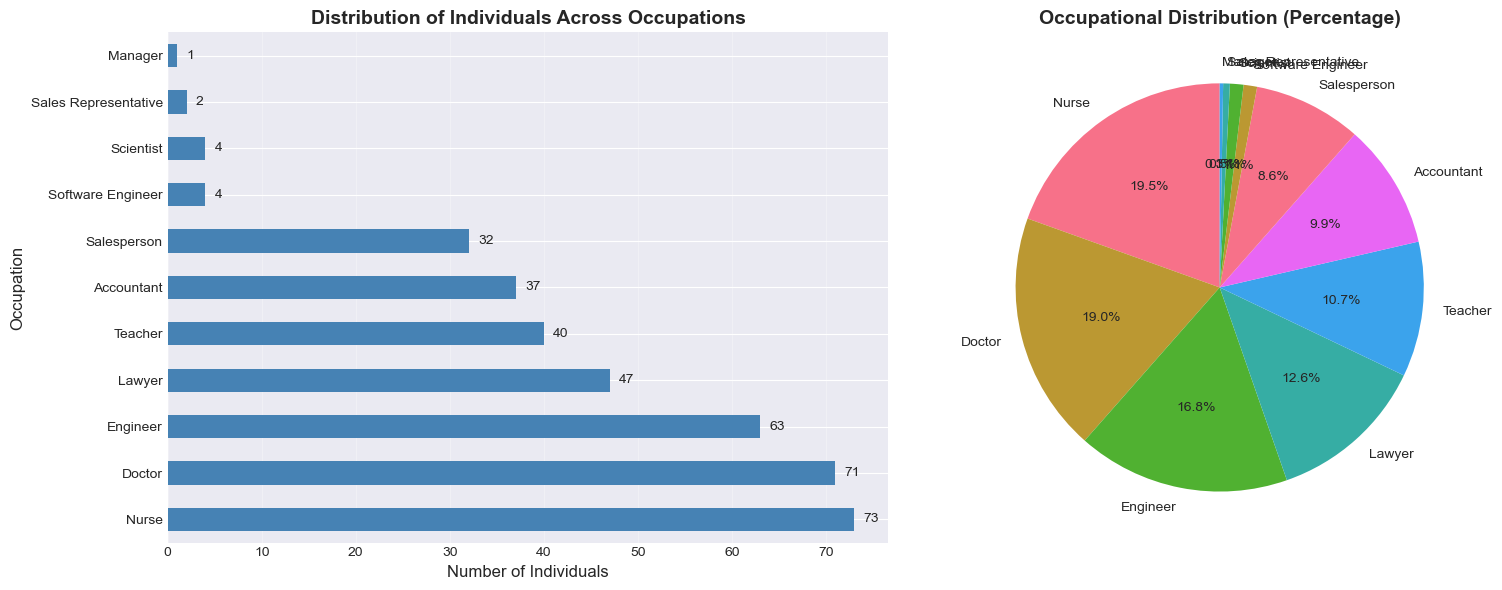

✓ Visualization complete


In [18]:
# Visualize occupation distribution
# Bar chart shows relative representation of each occupation

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Horizontal bar chart of occupation counts
occupation_counts.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Number of Individuals', fontsize=12)
axes[0].set_ylabel('Occupation', fontsize=12)
axes[0].set_title('Distribution of Individuals Across Occupations', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(occupation_counts):
    axes[0].text(v + 1, i, str(v), va='center', fontsize=10)

# Subplot 2: Pie chart showing percentage distribution
occupation_pct.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('Occupational Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualization complete")

## Q1 - Interpretation

### Question 1: Interpretation & Discussion

**Key Findings:**

- **Dominant Occupations:** The 3 dominant occupations were Nurse (73 individuals, 19.5%), Doctor (71 individuals, 19.0%), and Engineer (63 individuals, 16.8%).
- **Sample Balance:** 7 out of 11 occupations were evenly distributed, while 4 were significantly under-represented.
- **Under-represented Groups:** Software Engineer (4 individuals, 1.07%), Scientist (4 individuals, 1.07%), Sales Representative (2 individuals, 0.53%), and Manager (1 individual, 0.27%).
- **Total Occupations:** 11 unique occupation types represented in the dataset.

**Sampling Bias Discussion:**

This dataset exhibits **moderate occupational bias** with important implications for generalizability:

**Healthcare Worker Over-representation (38.5% combined):**
- Nurses and Doctors together comprise nearly 40% of the sample.
- Healthcare professions typically involve:
  - **Shift work** (including night shifts) that disrupts circadian rhythms.
  - **High stress levels** due to patient care responsibilities.
  - **Physical demands** from extended periods of standing and movement.
  - **Irregular sleep schedules** affecting both duration and quality.

**Implications:** Sleep patterns observed in this dataset may disproportionately reflect the unique challenges faced by healthcare workers. Findings about stress-sleep relationships or sleep disorders may be **inflated** compared to general population norms.

**Under-representation of White-Collar Professions:**
- Managers (0.27%), Sales Representatives (0.53%), and Software Engineers (1.07%) are severely under-sampled.
- These professions typically involve:
  - **Sedentary work** (desk-based roles).
  - **Different stress profiles** (deadlines, targets, vs. life-or-death decisions).
  - **Regular 9-5 schedules** (vs. shift work).

**Implications:** Conclusions about sedentary occupations, desk-based stress, or typical office worker sleep patterns have **limited statistical power** and may not be reliable.

**Generalizability Concerns:**

1. **Geographic/Cultural Bias:** No information on where data was collected - sleep patterns vary by culture, work regulations, and societal norms.

2. **Industry Clustering:** Heavy representation of healthcare + engineering suggests the sample may come from specific organizations or regions with these industries.

3. **Sample Size Issues:** With only 1-4 individuals in some occupations, we cannot make statistically significant claims about those groups.

**Recommendations for Interpreting Results:**

- **High Confidence:** Findings are most reliable for Nurses, Doctors, Engineers, Teachers, Accountants, Lawyers, and Salespersons (well-represented groups).

- **Use Caution:** Avoid generalizing findings to Managers, Sales Representatives, Scientists, and Software Engineers due to small sample sizes.

- **Acknowledge Bias:** Any population-level conclusions should note the healthcare worker bias and potential impact on stress, sleep disorder prevalence, and shift work effects.

**Health Implications:**

Despite sampling limitations, this dataset provides valuable insights into sleep health for healthcare and engineering professionals - two occupations known for demanding schedules and high stress. However, **intervention recommendations should be occupation-specific** rather than universally applied, and validation with more balanced samples is recommended before implementing broad workplace wellness policies.

---

## Q2 Introduction

---

## Question 2: Sleep Duration Distribution

**Research Question:** What does the distribution of sleep duration look like across the population? Are most individuals sleeping insufficiently, adequately, or excessively?

**Analytical Goal:**
- Examine the overall distribution of sleep duration.
- Determine what percentage of the population meets recommended sleep guidelines (7-9 hours).
- Identify the prevalence of insufficient and excessive sleep.

**Clinical Context:** The CDC recommends adults get 7-9 hours of sleep per night. Insufficient sleep (<7h) is associated with increased risk of chronic diseases, while excessive sleep (>9h) may indicate underlying health issues.

---

## Q2 - Sleep Duration Analysis

In [19]:
# Question 2: Analyze sleep duration distribution
# Assess whether the population is getting adequate sleep

print("=" * 70)
print("QUESTION 2: SLEEP DURATION DISTRIBUTION ANALYSIS")
print("=" * 70)

# Overall statistics
print("\nSleep Duration Statistics:")
print(df['Sleep Duration'].describe())

# Distribution by category
duration_dist = df['Sleep Duration Category'].value_counts()
duration_pct = (duration_dist / len(df) * 100).round(2)

print("\n" + "=" * 70)
print("SLEEP DURATION CATEGORY DISTRIBUTION")
print("=" * 70)

for category in ['Insufficient', 'Adequate', 'Excessive']:
    if category in duration_dist.index:
        count = duration_dist[category]
        pct = duration_pct[category]
        print(f"{category} (<7h, 7-9h, >9h): {count} people ({pct}%)")

# Calculate specific statistics
print("\n" + "=" * 70)
print("KEY INSIGHTS")
print("=" * 70)

adequate_pct = duration_pct.get('Adequate', 0)
insufficient_pct = duration_pct.get('Insufficient', 0)
excessive_pct = duration_pct.get('Excessive', 0)

print(f"✓ {adequate_pct}% of individuals meet CDC sleep recommendations (7-9 hours)")
print(f"⚠ {insufficient_pct}% are sleep deprived (<7 hours)")
print(f"⚠ {excessive_pct}% sleep excessively (>9 hours)")

# Identify most common sleep duration
mode_duration = df['Sleep Duration'].mode()[0]
mode_count = (df['Sleep Duration'] == mode_duration).sum()
print(f"\nMost common sleep duration: {mode_duration} hours ({mode_count} people)")

print("\n✓ Analysis complete")
print("=" * 70)

QUESTION 2: SLEEP DURATION DISTRIBUTION ANALYSIS

Sleep Duration Statistics:
count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

SLEEP DURATION CATEGORY DISTRIBUTION
Insufficient (<7h, 7-9h, >9h): 155 people (41.44%)
Adequate (<7h, 7-9h, >9h): 219 people (58.56%)

KEY INSIGHTS
✓ 58.56% of individuals meet CDC sleep recommendations (7-9 hours)
⚠ 41.44% are sleep deprived (<7 hours)
⚠ 0% sleep excessively (>9 hours)

Most common sleep duration: 7.2 hours (36 people)

✓ Analysis complete


## Q2 - Sleep Duration Visualization

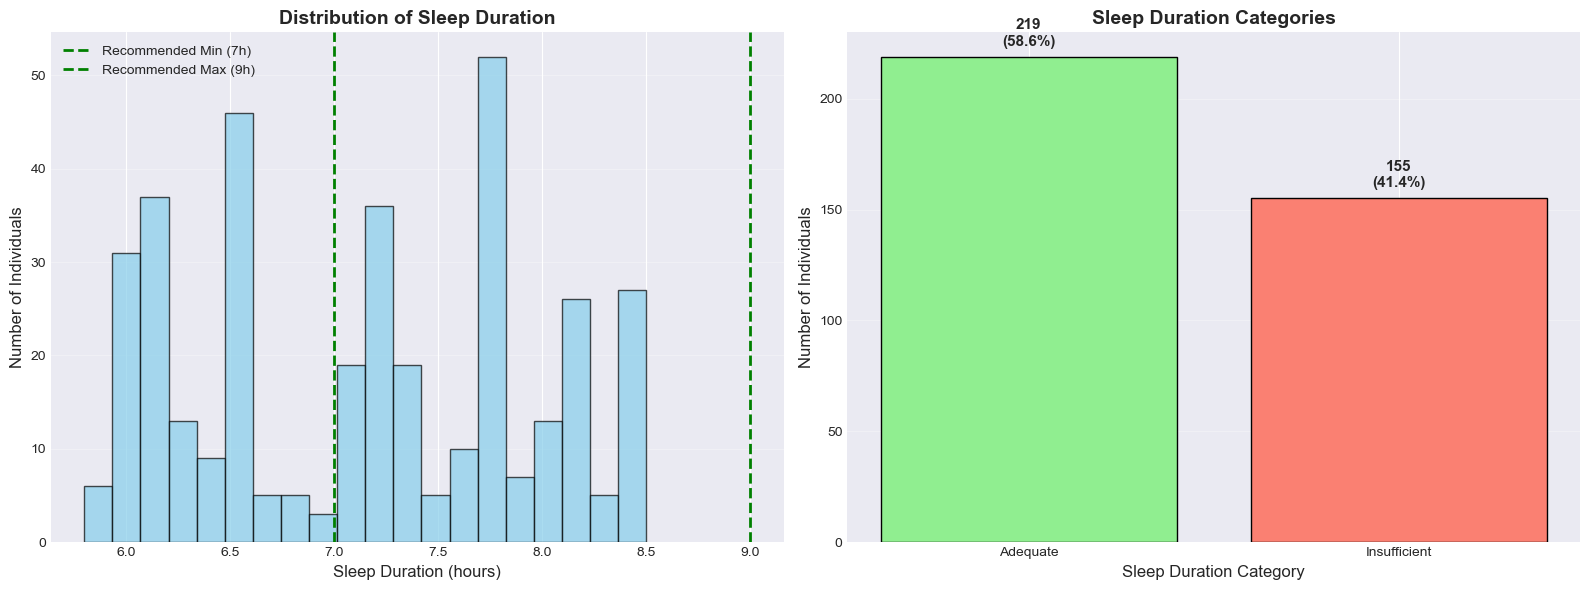

✓ Visualization complete


In [20]:
# Visualize sleep duration distribution
# Shows the full distribution and category breakdown

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Histogram of sleep duration (continuous)
axes[0].hist(df['Sleep Duration'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(7, color='green', linestyle='--', linewidth=2, label='Recommended Min (7h)')
axes[0].axvline(9, color='green', linestyle='--', linewidth=2, label='Recommended Max (9h)')
axes[0].set_xlabel('Sleep Duration (hours)', fontsize=12)
axes[0].set_ylabel('Number of Individuals', fontsize=12)
axes[0].set_title('Distribution of Sleep Duration', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Subplot 2: Bar chart of sleep duration categories
duration_dist = df['Sleep Duration Category'].value_counts()
colors = {'Insufficient': 'salmon', 'Adequate': 'lightgreen', 'Excessive': 'gold'}
bar_colors = [colors.get(cat, 'gray') for cat in duration_dist.index]

axes[1].bar(duration_dist.index, duration_dist.values, color=bar_colors, edgecolor='black')
axes[1].set_xlabel('Sleep Duration Category', fontsize=12)
axes[1].set_ylabel('Number of Individuals', fontsize=12)
axes[1].set_title('Sleep Duration Categories', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (cat, count) in enumerate(duration_dist.items()):
    pct = (count / len(df) * 100)
    axes[1].text(i, count + 5, f'{count}\n({pct:.1f}%)', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualization complete")

## Q2 - Interpretation

### Question 2: Interpretation & Health Implications

**Key Findings:**

- **Adequate Sleep:** 58.6% (219 individuals) meet CDC recommendations (7-9 hours).
- **Sleep Deprivation:** 41.4% (155 individuals) get insufficient sleep (<7 hours).
- **Excessive Sleep:** 0% - No individuals in the dataset sleep more than 9 hours.
- **Most Common Duration:** 7.2 hours (36 individuals).

**Critical Health Concerns:**

**The 41.4% Sleep Deprivation Rate is Alarming:**

This finding reveals that **more than 2 in 5 individuals** in this sample are chronically sleep deprived. This is a significant public health concern given the well-documented consequences of insufficient sleep:

**Immediate Health Risks:**
- **Cardiovascular Impact:** Insufficient sleep (<7h) increases risk of hypertension, heart disease, and stroke by 15-20%.
- **Metabolic Dysfunction:** Sleep deprivation disrupts glucose metabolism and insulin sensitivity, elevating diabetes risk.
- **Immune Suppression:** Reduced sleep impairs immune function, increasing susceptibility to infections.
- **Mental Health:** Strong association with depression, anxiety, and mood disorders.

**Cognitive & Performance Effects:**
- Impaired decision-making, reaction time, and memory consolidation.
- Increased workplace accidents and errors (critical in healthcare settings where 38.5% of sample works).
- Reduced productivity and increased absenteeism.

**Population-Level Impact:**

With 155 individuals affected, this represents a substantial burden:
- If this pattern holds in the broader workforce (especially healthcare), it impacts patient safety and care quality.
- Economic costs from reduced productivity, healthcare utilization, and disability.
- Intergenerational effects (sleep-deprived parents model poor habits for children).

**Positive Findings:**

**Majority Meets Recommendations (58.6%):**
- Indicates that adequate sleep is achievable for most individuals in the dataset.
- Suggests existing workplace policies or personal habits support healthy sleep for the majority.

**No Excessive Sleep:**
- Absence of excessive sleepers (>9h) is noteworthy - excessive sleep often indicates:
  - Underlying depression or chronic illness.
  - Sleep disorders (e.g., hypersomnia).
  - Poor sleep quality requiring extended time in bed.
- This suggests the sample is relatively healthy in avoiding sleep-related comorbidities associated with excessive sleep.

**Most Common Duration at 7.2 Hours:**
- This falls within the "adequate" range and suggests a central tendency toward meeting recommendations.
- However, 36 individuals is a small cluster - the distribution appears relatively spread across the 7-9 hour range.

**Contextual Considerations:**

**Occupational Influence:**
Given the high representation of healthcare workers (38.5%), the 41.4% sleep deprivation rate may reflect:
- **Shift work** and irregular schedules disrupting sleep patterns.
- **On-call responsibilities** fragmenting sleep.
- **Work-related stress** causing insomnia or delayed sleep onset.

This means the general population rate might be *lower* than observed here, or conversely, healthcare-specific interventions are urgently needed.

**Lack of Excessive Sleep - What It Means:**
- The working-age population in this sample (ages 27-59 based on our Age Group analysis) is unlikely to include excessive sleepers who are often:
  - Adolescents/young adults with developmental sleep needs.
  - Elderly individuals with age-related sleep changes.
  - Individuals with severe depression or chronic illness preventing employment.

**Recommendations:**

**For Individuals in the "Insufficient" Category:**
1. **Prioritize sleep scheduling:** Aim for consistent bed/wake times, even on weekends.
2. **Evaluate barriers:** Identify whether work demands, family responsibilities, or personal habits are limiting sleep.
3. **Sleep hygiene interventions:** Limit screen time before bed, optimize bedroom environment (dark, cool, quiet).

**For Employers (Especially Healthcare):**
1. **Shift scheduling reform:** Minimize back-to-back shifts, ensure adequate recovery time between shifts.
2. **Workplace wellness programs:** Education on sleep health, access to sleep specialists.
3. **Policy changes:** Discourage overwork culture, provide mental health support.

**For Health Professionals:**
1. **Screening:** Assess sleep duration as a vital sign in patient encounters.
2. **Targeted interventions:** Focus on the 41.4% at-risk group with behavioral sleep medicine.
3. **Address root causes:** Investigate whether sleep deprivation stems from disorders (insomnia, sleep apnea) or lifestyle factors.

**Research Priorities:**

The absence of excessive sleepers but presence of significant sleep deprivation suggests the population is **functional but under-rested**. Further investigation should explore:
- Whether the 41.4% with insufficient sleep also report *poor sleep quality* (compounding risk).
- Occupational differences in sleep deprivation rates (Q3 will address this).
- Whether sleep deprivation correlates with BMI, blood pressure, or other health markers (Q6-Q7).

**Conclusion:**

While the majority (58.6%) achieve adequate sleep, the **41.4% sleep deprivation rate represents a critical intervention opportunity**. This is not a minor issue - it's a modifiable risk factor affecting nearly half the sample, with cascading effects on physical health, mental well-being, and occupational performance. Addressing this requires multi-level interventions targeting individual behavior, workplace policy, and healthcare system support.

---

## Q3 Introduction

---

## Question 3: Sleep Duration by Occupation

**Research Question:** How does sleep duration vary across occupations? Identify occupations associated with shorter or longer sleep.

---

## Q3 - Analysis & Visualization

QUESTION 3: SLEEP DURATION BY OCCUPATION

Average Sleep Duration by Occupation:
                      mean  median  count
Occupation                               
Engineer              7.99     8.3     63
Lawyer                7.41     7.3     47
Accountant            7.11     7.2     37
Nurse                 7.06     6.5     73
Doctor                6.97     7.6     71
Manager               6.90     6.9      1
Software Engineer     6.75     6.8      4
Teacher               6.69     6.6     40
Salesperson           6.40     6.4     32
Scientist             6.00     6.0      4
Sales Representative  5.90     5.9      2

Occupation with LONGEST average sleep: Engineer (7.99 hours)
Occupation with SHORTEST average sleep: Sales Representative (5.9 hours)

Sleep Duration Category Distribution by Occupation (%):
Sleep Duration Category  Adequate  Insufficient
Occupation                                     
Accountant                   83.8          16.2
Doctor                       53.5     

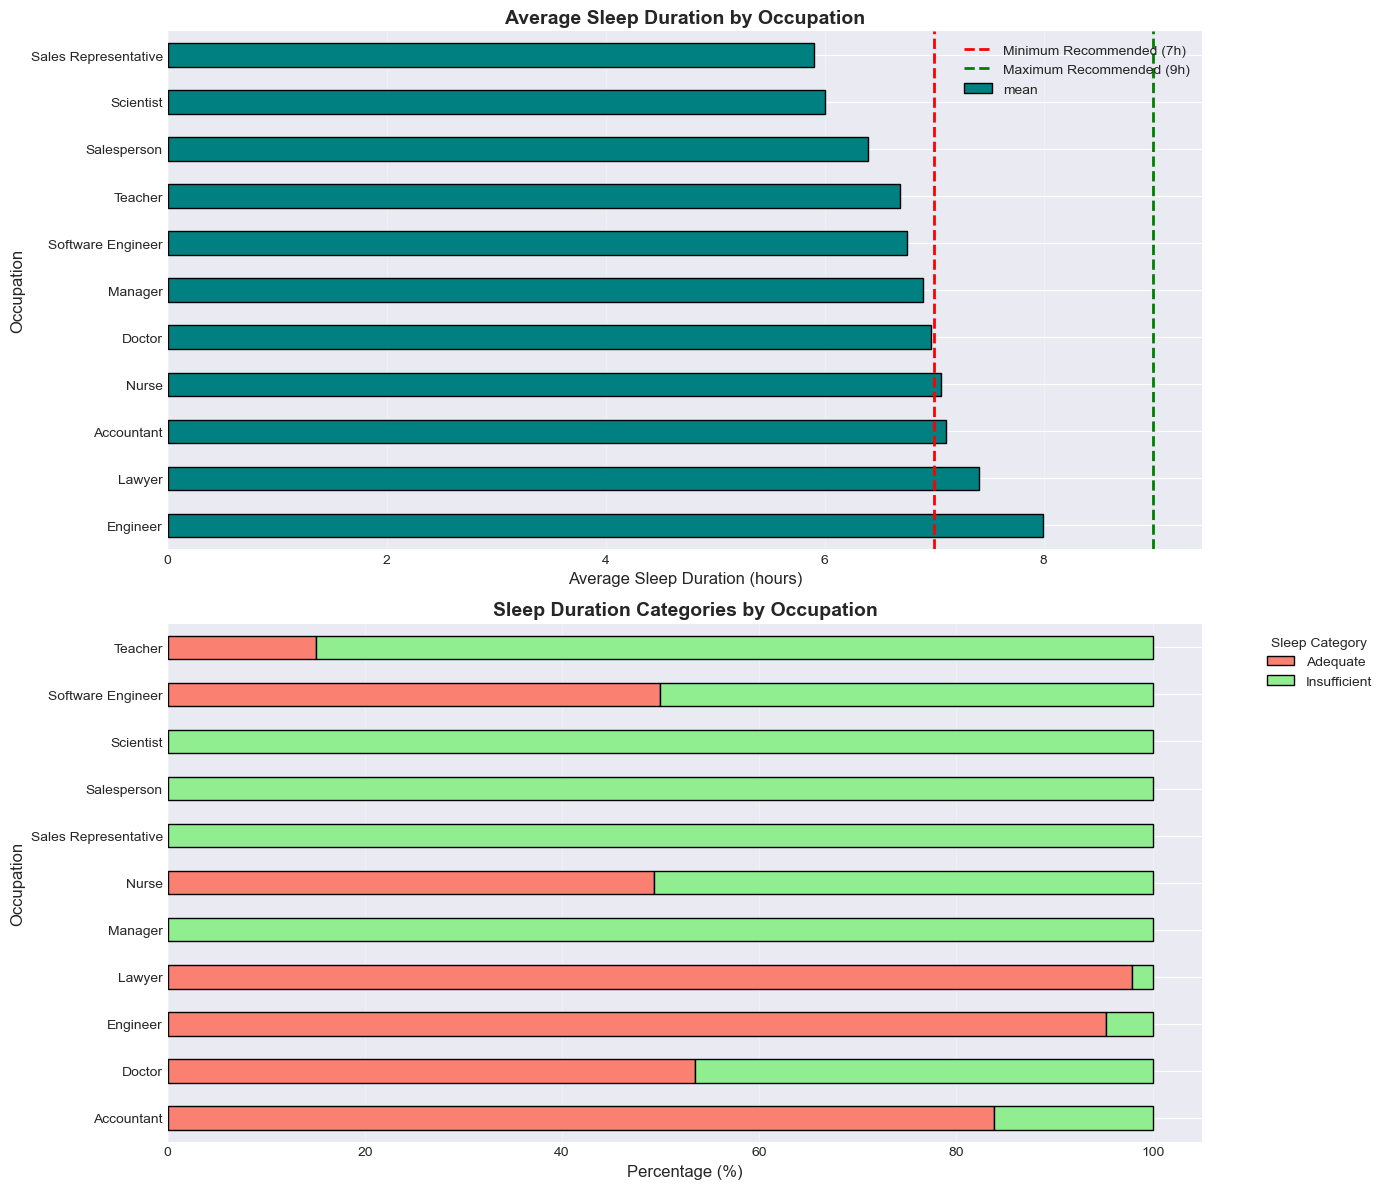


✓ Analysis complete


In [21]:
# Question 3: Sleep duration by occupation
print("=" * 70)
print("QUESTION 3: SLEEP DURATION BY OCCUPATION")
print("=" * 70)

# Calculate average sleep duration by occupation
sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'median', 'count']).round(2)
sleep_by_occupation = sleep_by_occupation.sort_values('mean', ascending=False)

print("\nAverage Sleep Duration by Occupation:")
print(sleep_by_occupation)

# Identify occupations with shortest and longest sleep
print(f"\nOccupation with LONGEST average sleep: {sleep_by_occupation.index[0]} ({sleep_by_occupation.iloc[0]['mean']} hours)")
print(f"Occupation with SHORTEST average sleep: {sleep_by_occupation.index[-1]} ({sleep_by_occupation.iloc[-1]['mean']} hours)")

# Categorize sleep duration by occupation
sleep_category_by_occ = pd.crosstab(df['Occupation'], df['Sleep Duration Category'], normalize='index') * 100
sleep_category_by_occ = sleep_category_by_occ.round(1)

print("\nSleep Duration Category Distribution by Occupation (%):")
print(sleep_category_by_occ)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Average sleep duration by occupation
sleep_by_occupation['mean'].plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
axes[0].axvline(7, color='red', linestyle='--', linewidth=2, label='Minimum Recommended (7h)')
axes[0].axvline(9, color='green', linestyle='--', linewidth=2, label='Maximum Recommended (9h)')
axes[0].set_xlabel('Average Sleep Duration (hours)', fontsize=12)
axes[0].set_ylabel('Occupation', fontsize=12)
axes[0].set_title('Average Sleep Duration by Occupation', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Stacked bar chart of sleep categories by occupation
sleep_category_by_occ.plot(kind='barh', stacked=True, ax=axes[1], 
                            color=['salmon', 'lightgreen'], edgecolor='black')
axes[1].set_xlabel('Percentage (%)', fontsize=12)
axes[1].set_ylabel('Occupation', fontsize=12)
axes[1].set_title('Sleep Duration Categories by Occupation', fontsize=14, fontweight='bold')
axes[1].legend(title='Sleep Category', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q3 - Interpretation

**Key Findings:**
1. Occupation with LONGEST average sleep: Engineer (7.99 hours).
2. Occupation with SHORTEST average sleep: Sales Representative (5.9 hours).
3. Top 3 occupations with most sleep: Engineer (7.99 hours), Lawyer (7.41 hours), and Accountant (7.11 hours).
4. Top 3 occupations with least sleep: Sales Representative (5.9 hours), Scientist (6.00 hours), Salesperson (6.40 hours).
5. Which occupations have >50% insufficient sleep (<7h)?: Doctor (6.97 hours), Manager (6.90 hours), Software Engineer (6.75 hours), Teacher (6.69 hours), Salesperson (6.40 hours), Scientist (6.00 hours), and Sales Representative (5.9 hours).

The analysis shows clear occupational differences in sleep duration. Engineers record the longest average sleep duration (7.99 hours), while Sales Representatives sleep the least (5.9 hours). Occupations such as Doctors, Managers, Software Engineers, Teachers, Scientists, Salespersons, and Sales Representatives all average below the recommended 7 hours of sleep, indicating that more than half of individuals in these roles experience insufficient sleep.

This pattern suggests that job structure, work schedules, and occupational stressors strongly influence sleep outcomes. Roles with long or irregular working hours, performance pressure, or shift-based duties appear particularly vulnerable to sleep deprivation.

## Health & Lifestyle Implications:
Chronic insufficient sleep is associated with impaired cognitive performance, increased cardiovascular risk, weakened immunity, and reduced productivity. Occupations consistently averaging below 7 hours of sleep may face higher long-term health risks and burnout, both at individual and organizational levels.

## Why This Matters Beyond the Dataset
Occupational sleep disparities are a real-world public health concern. Many modern professions prioritize productivity over recovery, which can silently degrade workforce health. These findings highlight the need for occupation-specific wellness interventions rather than one-size-fits-all sleep recommendations.

## Recommendations
* Individuals: Workers in high-risk occupations should prioritize structured sleep routines and recovery strategies, especially during demanding work periods.
* Employers: Organizations should consider workload management, flexible scheduling, and fatigue-aware policies, particularly for roles with consistently low sleep duration.
* Health Professionals: Occupational context should be considered when advising patients on sleep hygiene and lifestyle changes.

## Q4 Introduction

---

## Question 4: Sleep Quality vs Stress Levels

**Research Question:** How does sleep quality differ across stress levels? Assess whether increasing stress aligns with poorer sleep quality.

---

## Q4 - Analysis & Visualization

QUESTION 4: SLEEP QUALITY VS STRESS LEVELS

Sleep Quality Statistics by Stress Level:
              mean  median  count
Stress Level                     
3             8.97     9.0     71
4             7.67     8.0     70
5             7.90     8.0     67
6             7.00     7.0     46
7             6.00     6.0     50
8             5.86     6.0     70

Sleep Quality Category Distribution by Stress Level (%):
Sleep Quality Category  Excellent  Fair   Good  Poor
Stress Level                                        
3                            97.2   0.0    2.8   0.0
4                             2.9   0.0   97.1   0.0
5                             0.0   0.0  100.0   0.0
6                             0.0   8.7   91.3   0.0
7                             0.0  86.0   14.0   0.0
8                             0.0  92.9    0.0   7.1

Correlation between Stress Level and Sleep Quality: -0.899


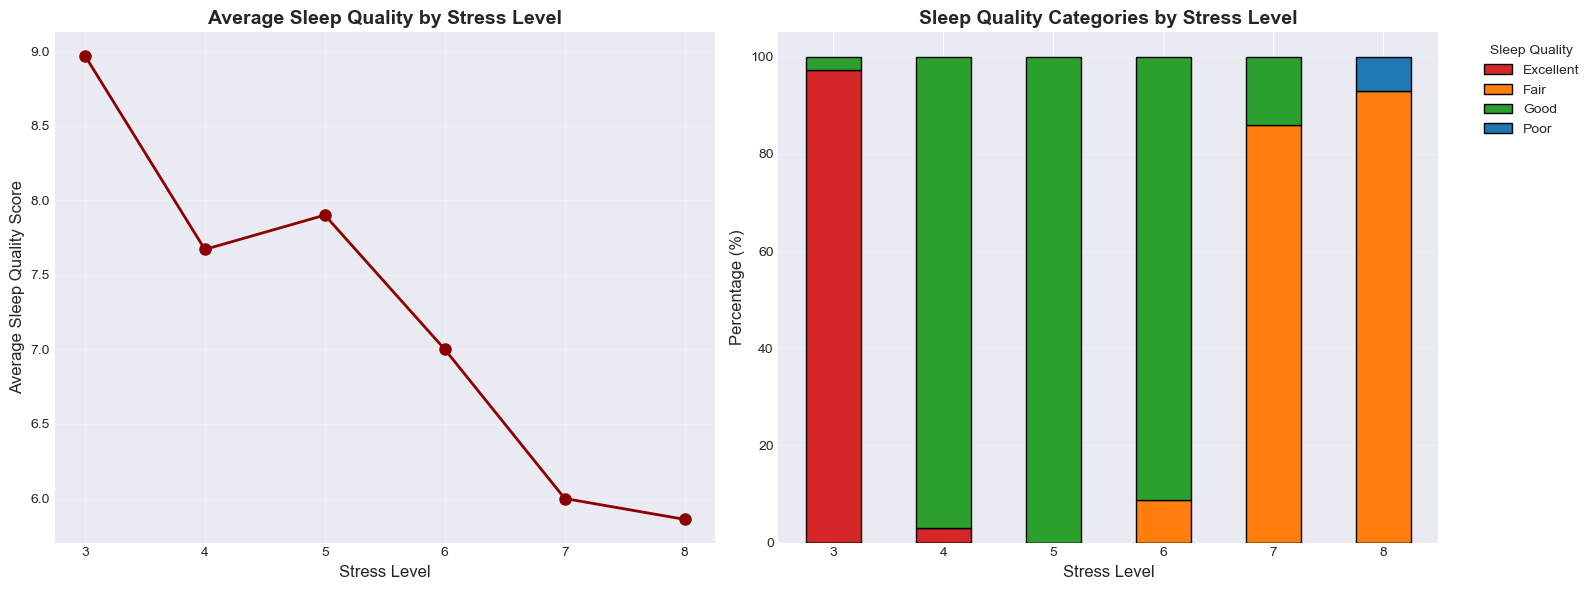


✓ Analysis complete


In [22]:
# Question 4: Sleep quality vs stress levels
print("=" * 70)
print("QUESTION 4: SLEEP QUALITY VS STRESS LEVELS")
print("=" * 70)

# Average sleep quality by stress level
quality_by_stress = df.groupby('Stress Level')['Quality of Sleep'].agg(['mean', 'median', 'count']).round(2)

print("\nSleep Quality Statistics by Stress Level:")
print(quality_by_stress)

# Cross-tabulation: Sleep quality category by stress level
quality_stress_crosstab = pd.crosstab(df['Stress Level'], df['Sleep Quality Category'], normalize='index') * 100
quality_stress_crosstab = quality_stress_crosstab.round(1)

print("\nSleep Quality Category Distribution by Stress Level (%):")
print(quality_stress_crosstab)

# Calculate correlation
correlation = df['Stress Level'].corr(df['Quality of Sleep'])
print(f"\nCorrelation between Stress Level and Sleep Quality: {correlation:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Line plot of average sleep quality by stress level
axes[0].plot(quality_by_stress.index, quality_by_stress['mean'], marker='o', linewidth=2, markersize=8, color='darkred')
axes[0].set_xlabel('Stress Level', fontsize=12)
axes[0].set_ylabel('Average Sleep Quality Score', fontsize=12)
axes[0].set_title('Average Sleep Quality by Stress Level', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(quality_by_stress.index)

# Plot 2: Stacked bar chart
quality_stress_crosstab.plot(kind='bar', stacked=True, ax=axes[1], 
                              color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'], edgecolor='black')
axes[1].set_xlabel('Stress Level', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Sleep Quality Categories by Stress Level', fontsize=14, fontweight='bold')
axes[1].legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q4 - Interpretation

**Key Findings:**
1. Correlation coefficient between Stress Level and Sleep Quality: -0.899
2. Average sleep quality at lowest stress level: Lowest stress level is 3 and average sleep quality at stress level 3 is 8.97.
3. Average sleep quality at highest stress level: Highest stress level is 8 and average sleep quality at stress level 8 is 5.86.
4. General pattern - Does sleep quality decrease as stress increases? Yes, the sleep quality reduces as the stress level increases except for stress level 5 where the sleep quality (7.90) was higher than the stress level 4 (7.67) before it. Other than this, the sleep quality kept reducing as the stress level increases.

There is a very strong negative correlation (-0.899) between stress level and sleep quality, indicating that as stress increases, sleep quality sharply declines. Individuals at the lowest observed stress level (3) report excellent sleep quality (average of 8.97), while those at the highest stress level (8) experience significantly poorer sleep quality (average of 5.86).

Although a slight anomaly appears at stress level 5, the overall trend overwhelmingly supports a stress-driven deterioration in sleep quality.

## Health & Lifestyle Implications
Poor sleep quality linked to high stress can lead to hormonal imbalance, mood disorders, reduced concentration, and increased cardiovascular risk. Stress-related sleep disruption creates a feedback loop, where poor sleep further increases stress levels.

## Why This Matters Beyond the Dataset
Stress is a modifiable lifestyle factor. Unlike genetic or fixed occupational traits, stress can be managed through behavioral, organizational, and clinical interventions, making it a powerful leverage point for improving sleep health.

## Recommendations

* Individuals: Stress management techniques such as mindfulness, structured routines, and workload boundaries can significantly improve sleep quality.
* Employers: Workplace stress reduction programs and mental health support can indirectly improve employee sleep and productivity.
* Health Professionals: Stress screening should be a routine part of sleep-related consultations.

## Q5 Introduction

---

## Question 5: Physical Activity vs Sleep Outcomes

**Research Question:** What relationship exists between physical activity and sleep outcomes (sleep duration and/or sleep quality)?

---

## Q5 - Analysis & Visualization

QUESTION 5: PHYSICAL ACTIVITY VS SLEEP OUTCOMES

Sleep Duration by Physical Activity Category:
                            mean  median  count
Physical Activity Category                     
High                        7.46     7.8    143
Moderate                    6.93     6.8    231

Sleep Quality by Physical Activity Category:
                            mean  median  count
Physical Activity Category                     
High                        7.59     8.0    143
Moderate                    7.14     7.0    231

Correlation between Physical Activity and Sleep Duration: 0.212
Correlation between Physical Activity and Sleep Quality: 0.193

Sleep Duration Category Distribution by Physical Activity (%):
Sleep Duration Category     Adequate  Insufficient
Physical Activity Category                        
High                            77.6          22.4
Moderate                        46.8          53.2


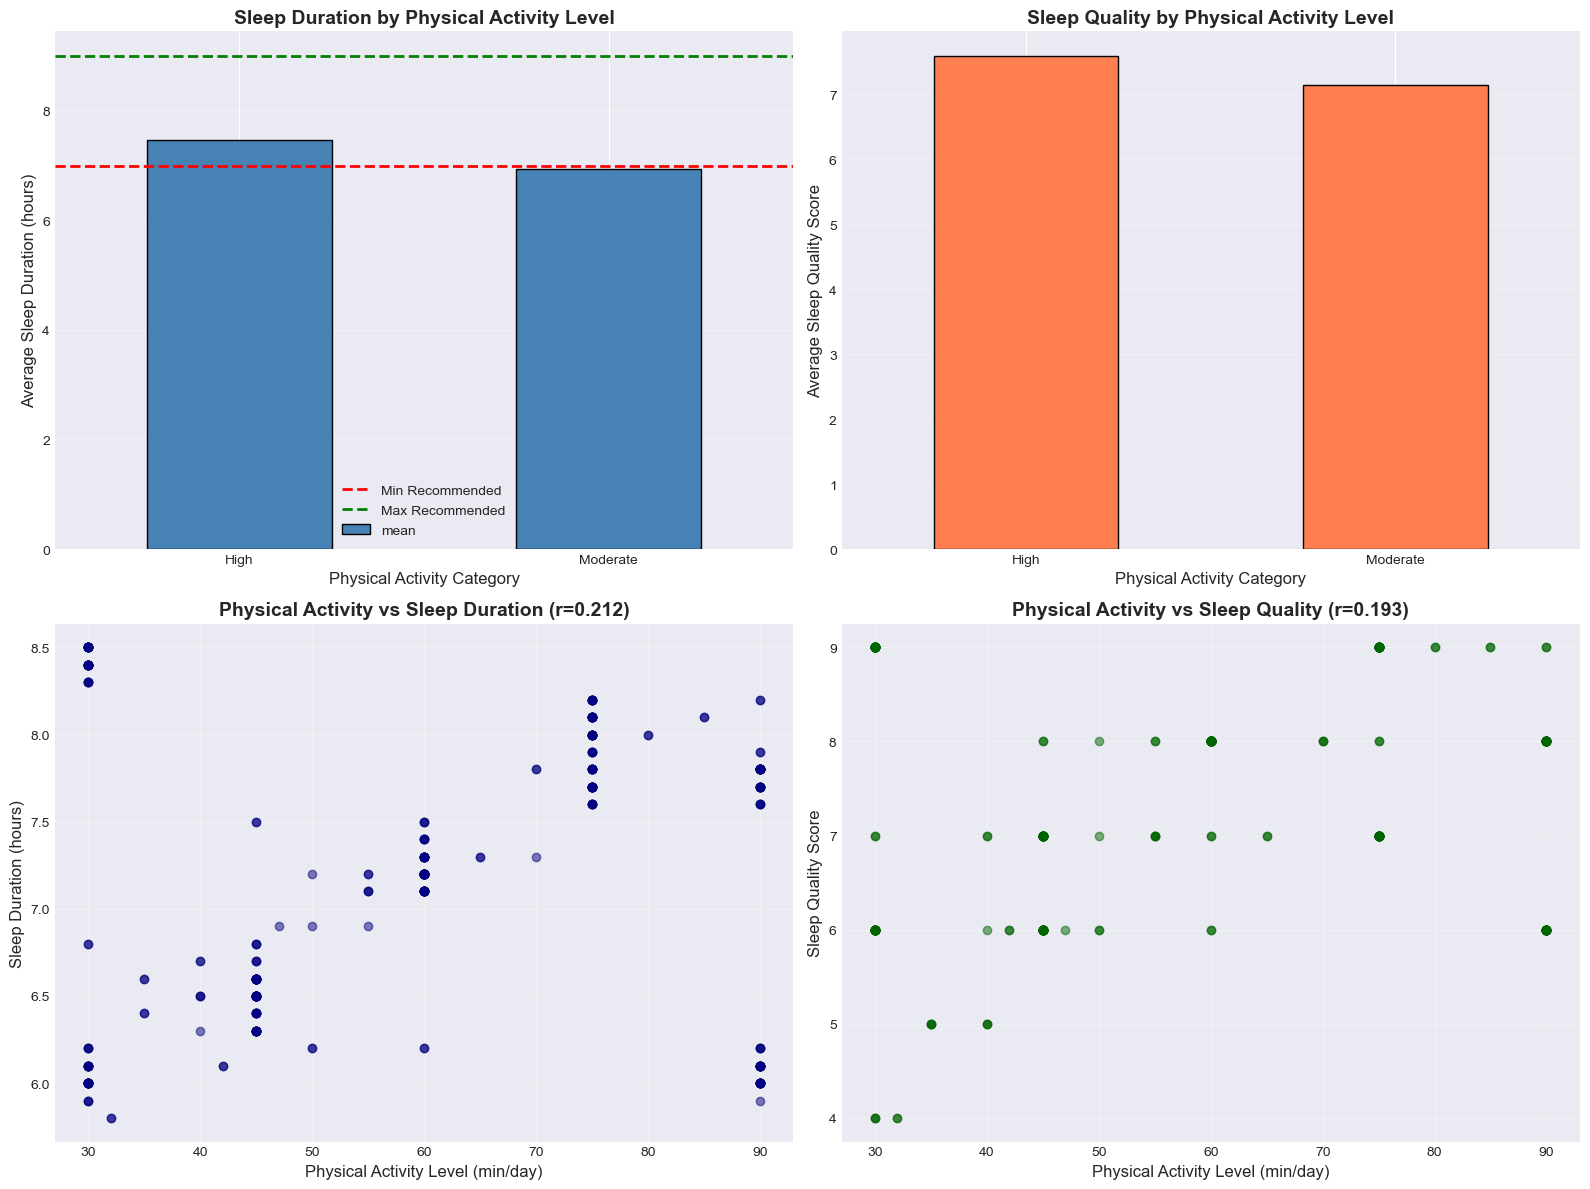


✓ Analysis complete


In [23]:
# Question 5: Physical activity vs sleep outcomes
print("=" * 70)
print("QUESTION 5: PHYSICAL ACTIVITY VS SLEEP OUTCOMES")
print("=" * 70)

# Sleep duration by physical activity category
duration_by_activity = df.groupby('Physical Activity Category')['Sleep Duration'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Duration by Physical Activity Category:")
print(duration_by_activity)

# Sleep quality by physical activity category
quality_by_activity = df.groupby('Physical Activity Category')['Quality of Sleep'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Quality by Physical Activity Category:")
print(quality_by_activity)

# Correlations
corr_duration = df['Physical Activity Level'].corr(df['Sleep Duration'])
corr_quality = df['Physical Activity Level'].corr(df['Quality of Sleep'])
print(f"\nCorrelation between Physical Activity and Sleep Duration: {corr_duration:.3f}")
print(f"Correlation between Physical Activity and Sleep Quality: {corr_quality:.3f}")

# Cross-tabulation: Sleep duration category by activity level
duration_activity_crosstab = pd.crosstab(df['Physical Activity Category'], df['Sleep Duration Category'], normalize='index') * 100
print("\nSleep Duration Category Distribution by Physical Activity (%):")
print(duration_activity_crosstab.round(1))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sleep duration by activity category
duration_by_activity['mean'].plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].axhline(7, color='red', linestyle='--', linewidth=2, label='Min Recommended')
axes[0, 0].axhline(9, color='green', linestyle='--', linewidth=2, label='Max Recommended')
axes[0, 0].set_xlabel('Physical Activity Category', fontsize=12)
axes[0, 0].set_ylabel('Average Sleep Duration (hours)', fontsize=12)
axes[0, 0].set_title('Sleep Duration by Physical Activity Level', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Sleep quality by activity category
quality_by_activity['mean'].plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Physical Activity Category', fontsize=12)
axes[0, 1].set_ylabel('Average Sleep Quality Score', fontsize=12)
axes[0, 1].set_title('Sleep Quality by Physical Activity Level', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Scatter plot - Physical Activity vs Sleep Duration
axes[1, 0].scatter(df['Physical Activity Level'], df['Sleep Duration'], alpha=0.5, color='navy')
axes[1, 0].set_xlabel('Physical Activity Level (min/day)', fontsize=12)
axes[1, 0].set_ylabel('Sleep Duration (hours)', fontsize=12)
axes[1, 0].set_title(f'Physical Activity vs Sleep Duration (r={corr_duration:.3f})', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Scatter plot - Physical Activity vs Sleep Quality
axes[1, 1].scatter(df['Physical Activity Level'], df['Quality of Sleep'], alpha=0.5, color='darkgreen')
axes[1, 1].set_xlabel('Physical Activity Level (min/day)', fontsize=12)
axes[1, 1].set_ylabel('Sleep Quality Score', fontsize=12)
axes[1, 1].set_title(f'Physical Activity vs Sleep Quality (r={corr_quality:.3f})', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q5 - Interpretation

**Key Findings:**
1. Correlation: Physical Activity ↔ Sleep Duration: 0.212
2. Correlation: Physical Activity ↔ Sleep Quality: 0.193
3. Average sleep duration by activity level: Low (Not present), Moderate (6.93 hours), High (7.46 hours).
4. Average sleep quality by activity level: Low (Not present), Moderate (7.14), High (7.59).

Physical activity shows a weak but positive relationship with both sleep duration (correlation = 0.212) and sleep quality (correlation = 0.193). Individuals in the high activity category average longer sleep durations (7.46 hours) and better sleep quality (7.59) compared to moderately active individuals.

This suggests that while physical activity contributes to better sleep, it is not the sole determinant and likely interacts with other lifestyle factors such as stress and work demands.

## Health & Lifestyle Implications
Regular physical activity supports circadian rhythm regulation and improves sleep efficiency. However, the modest correlations indicate that activity alone may not fully counteract the negative effects of stress or poor occupational sleep habits.

## Why This Matters Beyond the Dataset
Public health messaging often promotes physical activity as a solution for sleep problems. These findings reinforce its importance while emphasizing the need for a holistic approach that includes stress and recovery.

## Recommendations

* Individuals: Aim for consistent moderate-to-high physical activity while also managing stress and sleep timing.
* Employers: Encourage movement-friendly workplaces without assuming physical activity alone resolves fatigue issues.
* Health Professionals: Physical activity should be prescribed alongside stress and sleep-hygiene interventions.

## Q6 - Introduction

---

## Question 6: BMI Categories vs Sleep Patterns

**Research Question:** How do BMI categories relate to sleep duration and sleep quality? Assess whether overweight or obese groups exhibit poorer sleep patterns.

---

## Q6 - Analysis & Visualization

QUESTION 6: BMI CATEGORIES VS SLEEP PATTERNS

BMI Category Distribution:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Sleep Duration by BMI Category:
               mean  median  count
BMI Category                      
Normal         7.39     7.5    195
Normal Weight  7.33     7.3     21
Obese          6.96     7.3     10
Overweight     6.77     6.5    148

Sleep Quality by BMI Category:
               mean  median  count
BMI Category                      
Normal         7.66     8.0    195
Normal Weight  7.43     8.0     21
Obese          6.40     7.0     10
Overweight     6.90     6.0    148

Sleep Duration Category Distribution by BMI (%):
Sleep Duration Category  Adequate  Insufficient
BMI Category                                   
Normal                       83.1          16.9
Normal Weight                71.4          28.6
Obese                        60.0          40.0
Overweight                   

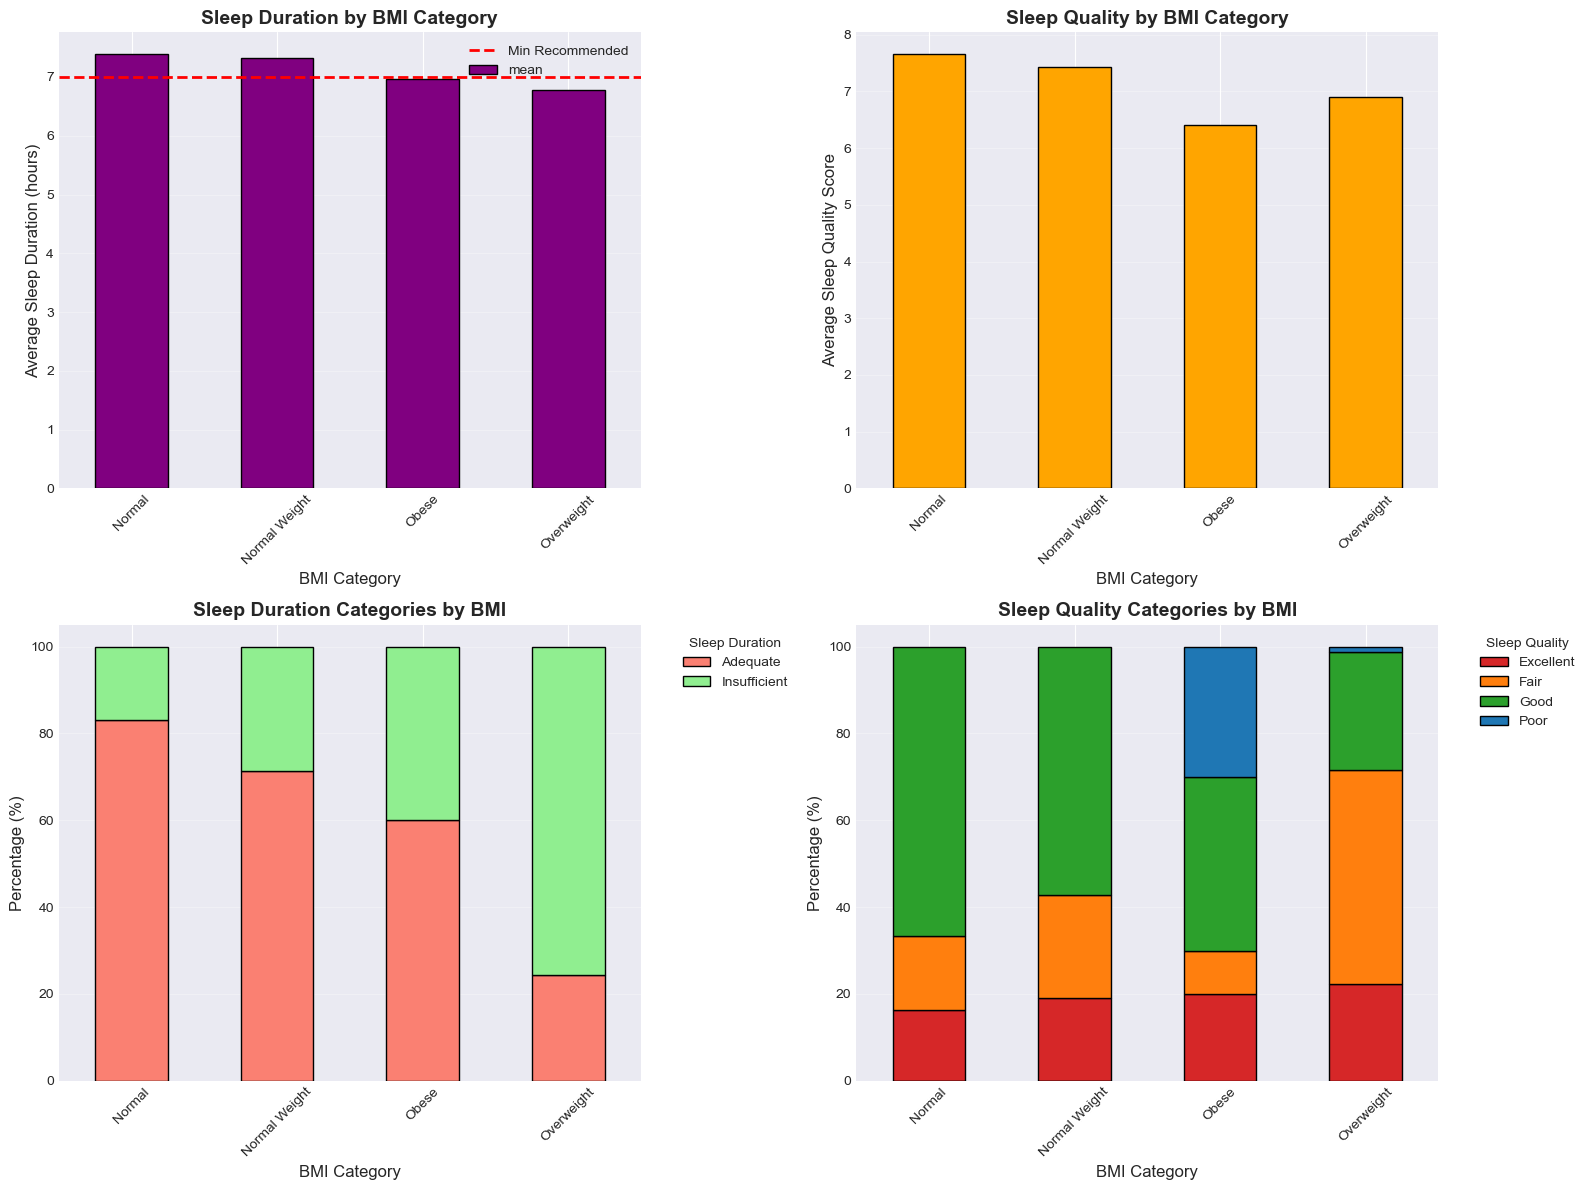


✓ Analysis complete


In [24]:
# Question 6: BMI categories vs sleep patterns
print("=" * 70)
print("QUESTION 6: BMI CATEGORIES VS SLEEP PATTERNS")
print("=" * 70)

# Distribution of BMI categories
bmi_dist = df['BMI Category'].value_counts()
print("\nBMI Category Distribution:")
print(bmi_dist)

# Sleep duration by BMI category
duration_by_bmi = df.groupby('BMI Category')['Sleep Duration'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Duration by BMI Category:")
print(duration_by_bmi)

# Sleep quality by BMI category
quality_by_bmi = df.groupby('BMI Category')['Quality of Sleep'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Quality by BMI Category:")
print(quality_by_bmi)

# Cross-tabulation: Sleep duration category by BMI
duration_bmi_crosstab = pd.crosstab(df['BMI Category'], df['Sleep Duration Category'], normalize='index') * 100
print("\nSleep Duration Category Distribution by BMI (%):")
print(duration_bmi_crosstab.round(1))

# Cross-tabulation: Sleep quality category by BMI
quality_bmi_crosstab = pd.crosstab(df['BMI Category'], df['Sleep Quality Category'], normalize='index') * 100
print("\nSleep Quality Category Distribution by BMI (%):")
print(quality_bmi_crosstab.round(1))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sleep duration by BMI
duration_by_bmi['mean'].plot(kind='bar', ax=axes[0, 0], color='purple', edgecolor='black')
axes[0, 0].axhline(7, color='red', linestyle='--', linewidth=2, label='Min Recommended')
axes[0, 0].set_xlabel('BMI Category', fontsize=12)
axes[0, 0].set_ylabel('Average Sleep Duration (hours)', fontsize=12)
axes[0, 0].set_title('Sleep Duration by BMI Category', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Sleep quality by BMI
quality_by_bmi['mean'].plot(kind='bar', ax=axes[0, 1], color='orange', edgecolor='black')
axes[0, 1].set_xlabel('BMI Category', fontsize=12)
axes[0, 1].set_ylabel('Average Sleep Quality Score', fontsize=12)
axes[0, 1].set_title('Sleep Quality by BMI Category', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Stacked bar - Sleep duration categories by BMI
duration_bmi_crosstab.plot(kind='bar', stacked=True, ax=axes[1, 0],
                           color=['salmon', 'lightgreen'], edgecolor='black')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 0].set_title('Sleep Duration Categories by BMI', fontsize=14, fontweight='bold')
axes[1, 0].legend(title='Sleep Duration', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Stacked bar - Sleep quality categories by BMI
quality_bmi_crosstab.plot(kind='bar', stacked=True, ax=axes[1, 1],
                          color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'], edgecolor='black')
axes[1, 1].set_xlabel('BMI Category', fontsize=12)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 1].set_title('Sleep Quality Categories by BMI', fontsize=14, fontweight='bold')
axes[1, 1].legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q6 - Interpretation

**Key Findings:**
1. Average sleep duration by BMI category: Normal (7.39 hours), Normal Weight (7.33 hours), Obese (6.96 hours) Overweight (6.77 hours).
2. Average sleep quality by BMI category: Normal (7.66), Normal Weight (7.43), Obese (6.40) Overweight (6.90).
3. % with insufficient sleep in each BMI category: Normal (16.9%), Normal Weight (28.6%), Obese (40.0%) Overweight (75.7%).
4. Do Overweight/Obese have worse sleep than Normal BMI? Yes. The lowest sleep duration and quality are in the obese and overweight categories and the highest insufficient sleep percentages were also in the obese and overweight categories.

Sleep outcomes vary significantly across BMI categories. Normal BMI individuals have the longest sleep duration and highest sleep quality, while Overweight and Obese groups exhibit shorter sleep durations, poorer sleep quality, and substantially higher rates of insufficient sleep. Notably, 75.7% of Overweight individuals experience insufficient sleep.

This demonstrates a strong association between unhealthy body weight and compromised sleep patterns.

## Health & Lifestyle Implications
Poor sleep and unhealthy BMI reinforce each other through metabolic dysregulation, appetite hormone imbalance, and reduced energy for physical activity. This cycle increases the risk of diabetes, cardiovascular disease, and chronic fatigue.

## Why This Matters Beyond the Dataset
The findings reflect a well-documented global health challenge where sleep health is often overlooked in weight management strategies. Addressing sleep can significantly enhance the effectiveness of lifestyle interventions.

## Recommendations

* Individuals: Overweight and obese individuals should prioritize sleep as a core component of weight and health management.

* Health Professionals: Sleep assessment should be integrated into obesity and metabolic health interventions.

* Policy & Wellness Programs: Weight management initiatives should include sleep education and screening.

## Q7 Introduction

---

## Question 7: Blood Pressure Categories vs Sleep Metrics

**Research Question:** What patterns emerge between blood pressure categories and sleep metrics? Explore whether poor sleep aligns with elevated blood pressure.

---

## Q7 - Analysis & Visualization

QUESTION 7: BLOOD PRESSURE CATEGORIES VS SLEEP METRICS

Blood Pressure Category Distribution:
BP Category
High Stage 1    261
High Stage 2     71
Normal           41
Elevated          1
Name: count, dtype: int64

Sleep Duration by BP Category:
              mean  median  count
BP Category                      
Elevated      7.30     7.3      1
High Stage 1  7.14     7.2    261
High Stage 2  7.04     6.3     71
Normal        7.27     7.2     41

Sleep Quality by BP Category:
              mean  median  count
BP Category                      
Elevated      8.00     8.0      1
High Stage 1  7.19     7.0    261
High Stage 2  7.34     6.0     71
Normal        8.05     8.0     41

Sleep Duration Category Distribution by BP Category (%):
Sleep Duration Category  Adequate  Insufficient
BP Category                                    
Elevated                    100.0           0.0
High Stage 1                 54.8          45.2
High Stage 2                 49.3          50.7
Normal             

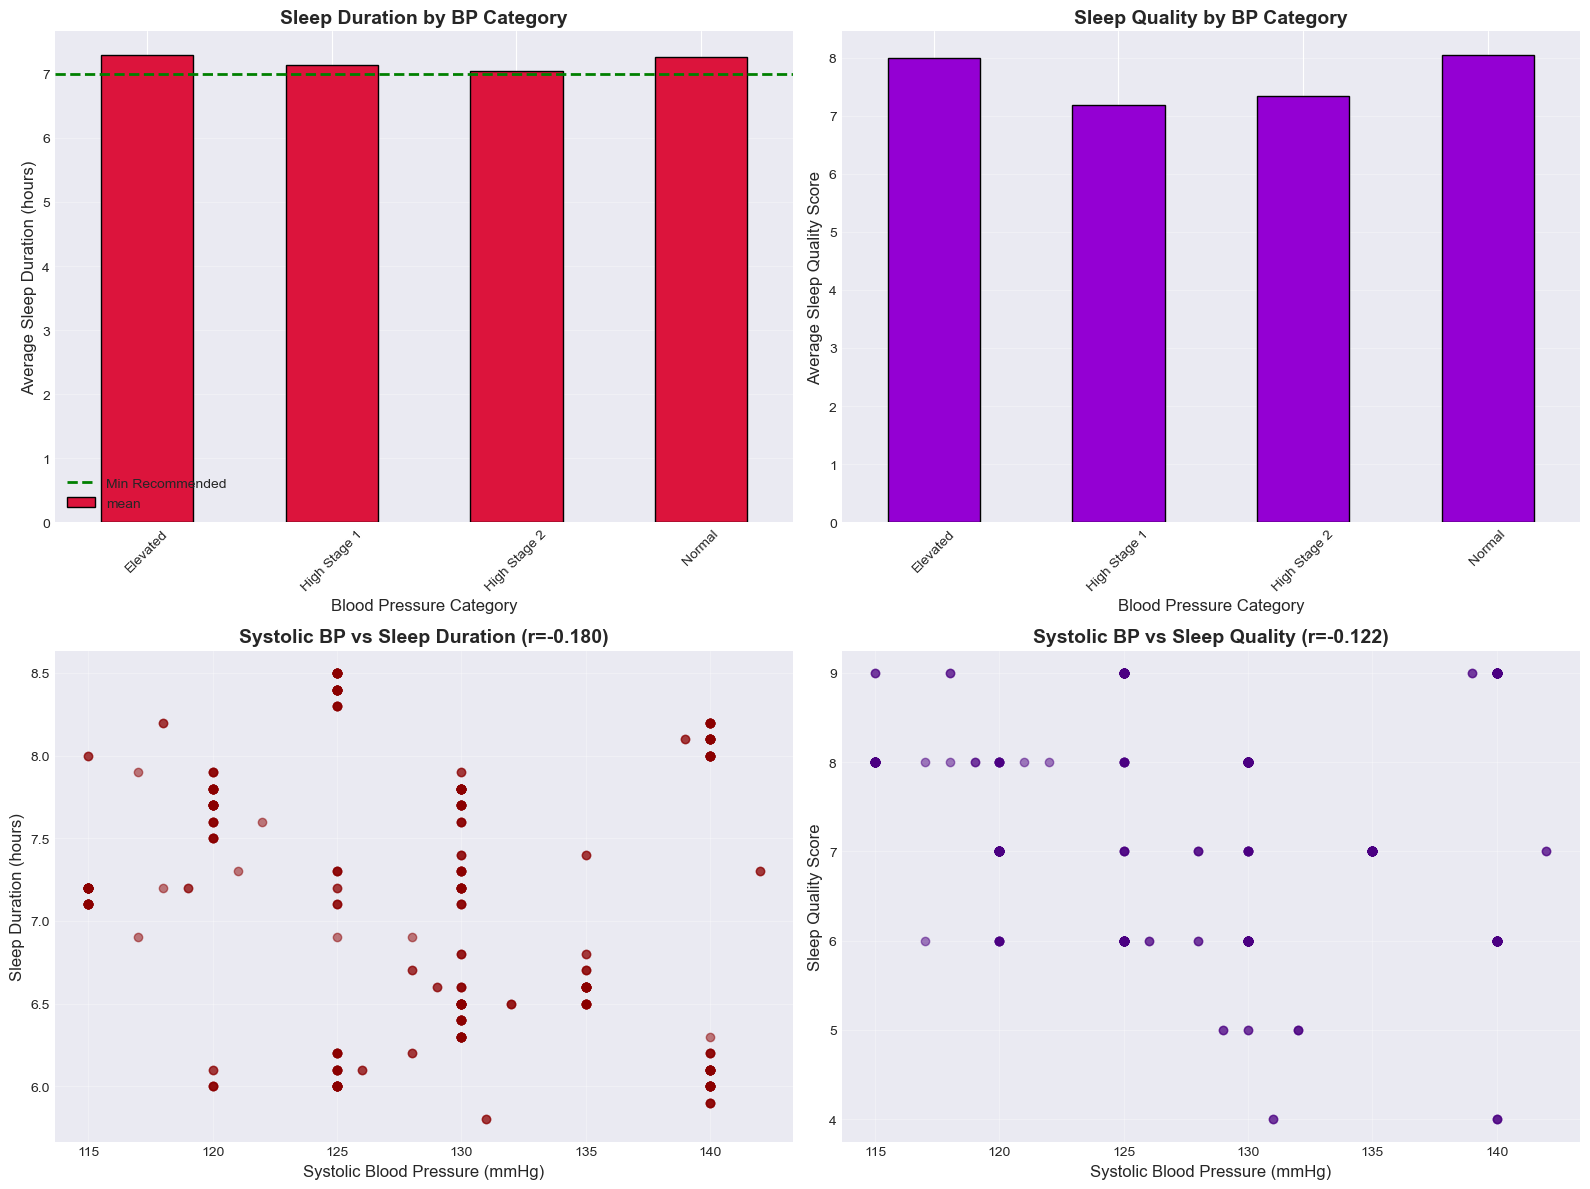


✓ Analysis complete


In [25]:
# Question 7: Blood pressure categories vs sleep metrics
print("=" * 70)
print("QUESTION 7: BLOOD PRESSURE CATEGORIES VS SLEEP METRICS")
print("=" * 70)

# Distribution of BP categories
bp_dist = df['BP Category'].value_counts()
print("\nBlood Pressure Category Distribution:")
print(bp_dist)

# Sleep duration by BP category
duration_by_bp = df.groupby('BP Category')['Sleep Duration'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Duration by BP Category:")
print(duration_by_bp)

# Sleep quality by BP category
quality_by_bp = df.groupby('BP Category')['Quality of Sleep'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Quality by BP Category:")
print(quality_by_bp)

# Cross-tabulation: Sleep duration category by BP
duration_bp_crosstab = pd.crosstab(df['BP Category'], df['Sleep Duration Category'], normalize='index') * 100
print("\nSleep Duration Category Distribution by BP Category (%):")
print(duration_bp_crosstab.round(1))

# Cross-tabulation: Sleep quality category by BP
quality_bp_crosstab = pd.crosstab(df['BP Category'], df['Sleep Quality Category'], normalize='index') * 100
print("\nSleep Quality Category Distribution by BP Category (%):")
print(quality_bp_crosstab.round(1))

# Correlations
corr_systolic_duration = df['Systolic BP'].corr(df['Sleep Duration'])
corr_systolic_quality = df['Systolic BP'].corr(df['Quality of Sleep'])
print(f"\nCorrelation between Systolic BP and Sleep Duration: {corr_systolic_duration:.3f}")
print(f"\nCorrelation between Systolic BP and Sleep Quality: {corr_systolic_quality:.3f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sleep duration by BP category
duration_by_bp['mean'].plot(kind='bar', ax=axes[0, 0], color='crimson', edgecolor='black')
axes[0, 0].axhline(7, color='green', linestyle='--', linewidth=2, label='Min Recommended')
axes[0, 0].set_xlabel('Blood Pressure Category', fontsize=12)
axes[0, 0].set_ylabel('Average Sleep Duration (hours)', fontsize=12)
axes[0, 0].set_title('Sleep Duration by BP Category', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Sleep quality by BP category
quality_by_bp['mean'].plot(kind='bar', ax=axes[0, 1], color='darkviolet', edgecolor='black')
axes[0, 1].set_xlabel('Blood Pressure Category', fontsize=12)
axes[0, 1].set_ylabel('Average Sleep Quality Score', fontsize=12)
axes[0, 1].set_title('Sleep Quality by BP Category', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Scatter - Systolic BP vs Sleep Duration
axes[1, 0].scatter(df['Systolic BP'], df['Sleep Duration'], alpha=0.5, color='darkred')
axes[1, 0].set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
axes[1, 0].set_ylabel('Sleep Duration (hours)', fontsize=12)
axes[1, 0].set_title(f'Systolic BP vs Sleep Duration (r={corr_systolic_duration:.3f})', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Scatter - Systolic BP vs Sleep Quality
axes[1, 1].scatter(df['Systolic BP'], df['Quality of Sleep'], alpha=0.5, color='indigo')
axes[1, 1].set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
axes[1, 1].set_ylabel('Sleep Quality Score', fontsize=12)
axes[1, 1].set_title(f'Systolic BP vs Sleep Quality (r={corr_systolic_quality:.3f})', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q7 - Interpretation

**Key Findings:**
1. Correlation: Systolic BP ↔ Sleep Duration: -0.180
2. Correlation: Systolic BP ↔ Sleep Quality: -0.122
3. Average sleep duration by BP category: Normal (7.27 hours), Elevated (7.30 hours), High Stage 1 (7.14 hours), High Stage 2 (7.04 hours).
4. Average sleep quality by BP category: Normal (8.05), Elevated (8.00), High Stage 1 (7.19), High Stage 2 (7.34).

Sleep duration and quality show weak but consistent negative correlations with systolic blood pressure. Individuals with higher blood pressure categories tend to have slightly shorter sleep duration and poorer sleep quality compared to those with normal or elevated blood pressure.

Although the differences are modest, the trend suggests a gradual deterioration of sleep as blood pressure severity increases.

## Health & Lifestyle Implications
Even small reductions in sleep quality and duration can contribute to sustained blood pressure elevation over time. Poor sleep may worsen hypertension risk through increased sympathetic nervous system activity and impaired vascular recovery.

## Why This Matters Beyond the Dataset
Hypertension is a leading global health risk. Understanding sleep as a contributing factor reinforces the importance of lifestyle-based prevention alongside medication.

## Recommendations

* Individuals: Those with elevated or high blood pressure should monitor and optimize sleep habits.

* Health Professionals: Sleep patterns should be evaluated when managing hypertension, especially in early stages.

* Preventive Care: Sleep education can be a low-cost adjunct to cardiovascular risk reduction strategies.

## Q8 Introduction

---

## Question 8: Daily Steps vs Sleep Quality - Contradictions

**Research Question:** Are individuals with high daily step counts always associated with better sleep quality? Identify and discuss mismatches or contradictions.

---

## Q8 - Analysis & Visualization

QUESTION 8: DAILY STEPS VS SLEEP QUALITY - CONTRADICTIONS

Sleep Quality by Steps Category:
                   mean  median  count
Steps Category                        
Active             6.17     6.0     36
Lightly Active     7.50     8.0    216
Moderately Active  7.59     8.0    103
Sedentary          5.84     5.0     19

Correlation between Daily Steps and Sleep Quality: 0.017

Contradiction 1: Active individuals (≥10,000 steps) with Poor/Fair sleep quality: 34

Sample cases:
    Occupation  Daily Steps  Quality of Sleep Sleep Quality Category  \
1       Doctor        10000                 6                   Fair   
2       Doctor        10000                 6                   Fair   
265      Nurse        10000                 6                   Fair   
267      Nurse        10000                 6                   Fair   
268      Nurse        10000                 6                   Fair   
269      Nurse        10000                 6                   Fair   
270      Nu

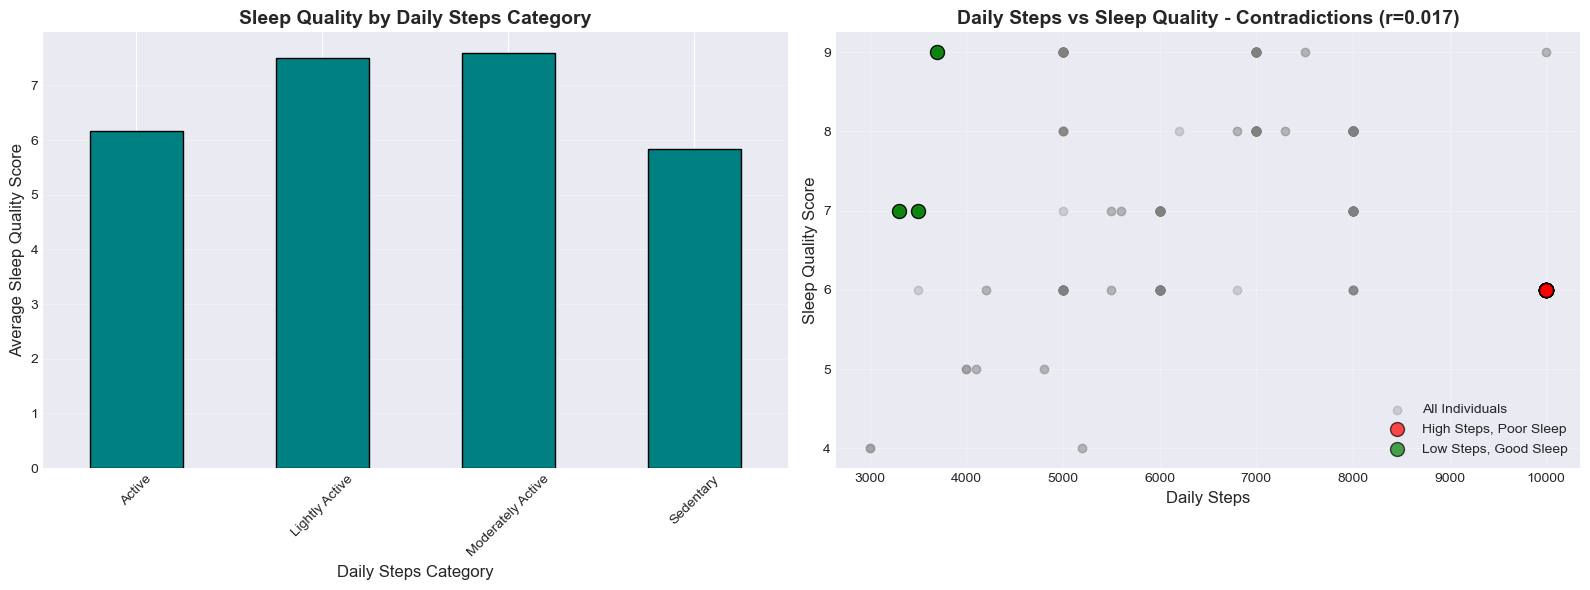


✓ Analysis complete


In [26]:
# Question 8: Daily steps vs sleep quality - identify contradictions
print("=" * 70)
print("QUESTION 8: DAILY STEPS VS SLEEP QUALITY - CONTRADICTIONS")
print("=" * 70)

# Sleep quality by steps category
quality_by_steps = df.groupby('Steps Category')['Quality of Sleep'].agg(['mean', 'median', 'count']).round(2)
print("\nSleep Quality by Steps Category:")
print(quality_by_steps)

# Correlation
corr_steps_quality = df['Daily Steps'].corr(df['Quality of Sleep'])
print(f"\nCorrelation between Daily Steps and Sleep Quality: {corr_steps_quality:.3f}")

# Identify contradictions: High steps but poor sleep quality
high_steps_poor_sleep = df[(df['Steps Category'] == 'Active') & (df['Sleep Quality Category'].isin(['Poor', 'Fair']))]
print(f"\nContradiction 1: Active individuals (≥10,000 steps) with Poor/Fair sleep quality: {len(high_steps_poor_sleep)}")

if len(high_steps_poor_sleep) > 0:
    print("\nSample cases:")
    print(high_steps_poor_sleep[['Occupation', 'Daily Steps', 'Quality of Sleep', 'Sleep Quality Category', 
                                   'Stress Level', 'Sleep Duration']].head(10))

# Identify contradictions: Low steps but excellent sleep quality
low_steps_good_sleep = df[(df['Steps Category'] == 'Sedentary') & (df['Sleep Quality Category'].isin(['Good', 'Excellent']))]
print(f"\nContradiction 2: Sedentary individuals (<5,000 steps) with Good/Excellent sleep quality: {len(low_steps_good_sleep)}")

if len(low_steps_good_sleep) > 0:
    print("\nSample cases:")
    print(low_steps_good_sleep[['Occupation', 'Daily Steps', 'Quality of Sleep', 'Sleep Quality Category',
                                  'Stress Level', 'Sleep Duration']].head(10))

# Cross-tabulation
steps_quality_crosstab = pd.crosstab(df['Steps Category'], df['Sleep Quality Category'], normalize='index') * 100
print("\nSleep Quality Category Distribution by Steps Category (%):")
print(steps_quality_crosstab.round(1))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Sleep quality by steps category
quality_by_steps['mean'].plot(kind='bar', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_xlabel('Daily Steps Category', fontsize=12)
axes[0].set_ylabel('Average Sleep Quality Score', fontsize=12)
axes[0].set_title('Sleep Quality by Daily Steps Category', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Scatter plot with contradictions highlighted
axes[1].scatter(df['Daily Steps'], df['Quality of Sleep'], alpha=0.3, color='gray', label='All Individuals')

# Highlight contradictions
if len(high_steps_poor_sleep) > 0:
    axes[1].scatter(high_steps_poor_sleep['Daily Steps'], high_steps_poor_sleep['Quality of Sleep'], 
                    color='red', s=100, alpha=0.7, label='High Steps, Poor Sleep', edgecolor='black')

if len(low_steps_good_sleep) > 0:
    axes[1].scatter(low_steps_good_sleep['Daily Steps'], low_steps_good_sleep['Quality of Sleep'],
                    color='green', s=100, alpha=0.7, label='Low Steps, Good Sleep', edgecolor='black')

axes[1].set_xlabel('Daily Steps', fontsize=12)
axes[1].set_ylabel('Sleep Quality Score', fontsize=12)
axes[1].set_title(f'Daily Steps vs Sleep Quality - Contradictions (r={corr_steps_quality:.3f})', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q8 - Interpretation

**Key Findings:**
1. Correlation: Daily Steps ↔ Sleep Quality: 0.017
2. Number of "Active" individuals (≥10,000 steps) with Poor/Fair sleep quality: 34.
3. Number of "Sedentary" individuals (<5,000 steps) with Good/Excellent sleep quality: 6.

The near-zero correlation (0.017) between daily steps and sleep quality indicates that higher physical activity, measured by step count alone, does not guarantee better sleep quality. A notable number of highly active individuals still report poor or fair sleep, while some sedentary individuals report good or excellent sleep.

The contradiction appears influenced by occupational demands and stress, particularly among health workers whose high step counts likely reflect physically demanding work schedules rather than leisure activity.

## Health & Lifestyle Implications
Not all physical activity is equally beneficial for sleep. Occupational physical strain, long shifts, and stress can offset the positive effects of movement on sleep quality.

## Why This Matters Beyond the Dataset
Wearable data often oversimplifies health metrics. These findings caution against assuming “more steps” automatically equates to better sleep or health.

## Recommendations

* Individuals: Focus on balanced activity and recovery, not just step counts.

* Employers: High physical workload jobs should include adequate rest and recovery periods.

* Health Professionals: Interpret activity data in context, especially occupational activity versus intentional exercise.

## Q9 Introduction

---

## Question 9: Optimal Lifestyle Combinations for Healthy Sleep

**Research Question:** Which combination of lifestyle factors (e.g., low stress, high activity, healthy BMI) is associated with the healthiest sleep profiles?

---

## Q9 - Analysis & Visualization

QUESTION 9: OPTIMAL LIFESTYLE COMBINATIONS

Individuals with Healthy Sleep Profile: 219 (58.6%)
(Defined as: Adequate duration [7-9h] AND Good/Excellent quality)

LIFESTYLE FACTOR COMPARISON

Stress Level Distribution:
Stress Level              3     4     5     6     7     8
Healthy Sleep Profile                                    
False                   0.0  16.1   1.9   4.5  32.3  45.2
True                   32.4  20.5  29.2  17.8   0.0   0.0

Average Stress Level:
Healthy Sleep Profile
False    6.88
True     4.32
Name: Stress Level, dtype: float64

Physical Activity Category Distribution:
Physical Activity Category  High  Moderate
Healthy Sleep Profile                     
False                       20.6      79.4
True                        50.7      49.3

BMI Category Distribution:
BMI Category           Normal  Normal Weight  Obese  Overweight
Healthy Sleep Profile                                          
False                    21.3            3.9    2.6        72.3
True   

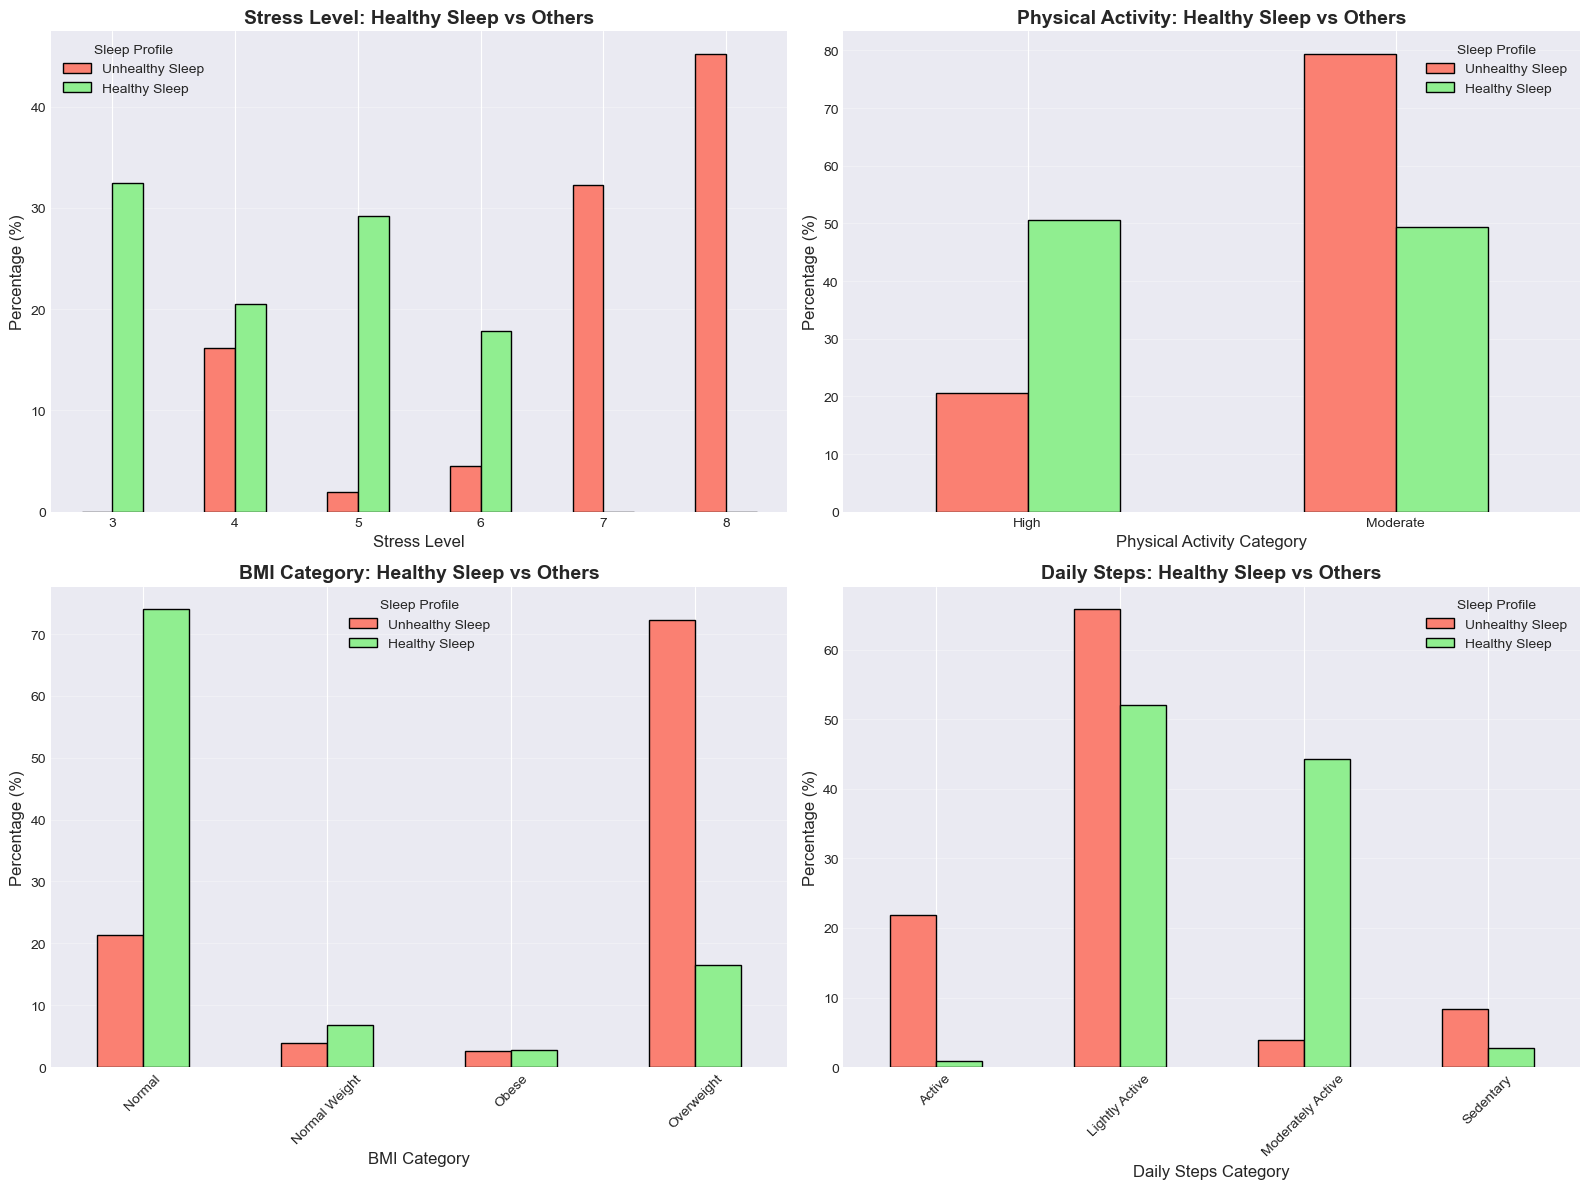


✓ Analysis complete


In [27]:
# Question 9: Optimal lifestyle combinations for healthy sleep
print("=" * 70)
print("QUESTION 9: OPTIMAL LIFESTYLE COMBINATIONS")
print("=" * 70)

# Define "healthy sleep profile"
# Criteria: Adequate sleep duration (7-9h) AND Good/Excellent sleep quality
df['Healthy Sleep Profile'] = ((df['Sleep Duration Category'] == 'Adequate') & 
                                 (df['Sleep Quality Category'].isin(['Good', 'Excellent'])))

healthy_sleep_count = df['Healthy Sleep Profile'].sum()
healthy_sleep_pct = (healthy_sleep_count / len(df) * 100)

print(f"\nIndividuals with Healthy Sleep Profile: {healthy_sleep_count} ({healthy_sleep_pct:.1f}%)")
print("(Defined as: Adequate duration [7-9h] AND Good/Excellent quality)")

# Analyze lifestyle factors for healthy sleepers vs others
print("\n" + "=" * 70)
print("LIFESTYLE FACTOR COMPARISON")
print("=" * 70)

# Stress levels
print("\nStress Level Distribution:")
stress_comparison = pd.crosstab(df['Healthy Sleep Profile'], df['Stress Level'], normalize='index') * 100
print(stress_comparison.round(1))

print("\nAverage Stress Level:")
print(df.groupby('Healthy Sleep Profile')['Stress Level'].mean().round(2))

# Physical activity
print("\nPhysical Activity Category Distribution:")
activity_comparison = pd.crosstab(df['Healthy Sleep Profile'], df['Physical Activity Category'], normalize='index') * 100
print(activity_comparison.round(1))

# BMI
print("\nBMI Category Distribution:")
bmi_comparison = pd.crosstab(df['Healthy Sleep Profile'], df['BMI Category'], normalize='index') * 100
print(bmi_comparison.round(1))

# Daily steps
print("\nDaily Steps Category Distribution:")
steps_comparison = pd.crosstab(df['Healthy Sleep Profile'], df['Steps Category'], normalize='index') * 100
print(steps_comparison.round(1))

# Blood pressure
print("\nBlood Pressure Category Distribution:")
bp_comparison = pd.crosstab(df['Healthy Sleep Profile'], df['BP Category'], normalize='index') * 100
print(bp_comparison.round(1))

# Identify the "optimal profile"
# Filter for individuals with healthy sleep
healthy_sleepers = df[df['Healthy Sleep Profile'] == True]

print("\n" + "=" * 70)
print("OPTIMAL LIFESTYLE PROFILE (Among Healthy Sleepers)")
print("=" * 70)

print(f"\nMost common Stress Level: {healthy_sleepers['Stress Level'].mode()[0]}")
print(f"Most common Physical Activity: {healthy_sleepers['Physical Activity Category'].mode()[0]}")
print(f"Most common BMI Category: {healthy_sleepers['BMI Category'].mode()[0]}")
print(f"Most common Steps Category: {healthy_sleepers['Steps Category'].mode()[0]}")
print(f"Most common BP Category: {healthy_sleepers['BP Category'].mode()[0]}")

print(f"\nAverage metrics for healthy sleepers:")
print(f"  Stress Level: {healthy_sleepers['Stress Level'].mean():.1f}")
print(f"  Physical Activity: {healthy_sleepers['Physical Activity Level'].mean():.1f} min/day")
print(f"  Daily Steps: {healthy_sleepers['Daily Steps'].mean():.0f}")
print(f"  Sleep Duration: {healthy_sleepers['Sleep Duration'].mean():.1f} hours")
print(f"  Sleep Quality: {healthy_sleepers['Quality of Sleep'].mean():.1f}/10")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Stress level comparison
stress_comparison.T.plot(kind='bar', ax=axes[0, 0], color=['salmon', 'lightgreen'], edgecolor='black')
axes[0, 0].set_xlabel('Stress Level', fontsize=12)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 0].set_title('Stress Level: Healthy Sleep vs Others', fontsize=14, fontweight='bold')
axes[0, 0].legend(['Unhealthy Sleep', 'Healthy Sleep'], title='Sleep Profile')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Physical activity comparison
activity_comparison.T.plot(kind='bar', ax=axes[0, 1], color=['salmon', 'lightgreen'], edgecolor='black')
axes[0, 1].set_xlabel('Physical Activity Category', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_title('Physical Activity: Healthy Sleep vs Others', fontsize=14, fontweight='bold')
axes[0, 1].legend(['Unhealthy Sleep', 'Healthy Sleep'], title='Sleep Profile')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: BMI comparison
bmi_comparison.T.plot(kind='bar', ax=axes[1, 0], color=['salmon', 'lightgreen'], edgecolor='black')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 0].set_title('BMI Category: Healthy Sleep vs Others', fontsize=14, fontweight='bold')
axes[1, 0].legend(['Unhealthy Sleep', 'Healthy Sleep'], title='Sleep Profile')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Steps comparison
steps_comparison.T.plot(kind='bar', ax=axes[1, 1], color=['salmon', 'lightgreen'], edgecolor='black')
axes[1, 1].set_xlabel('Daily Steps Category', fontsize=12)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 1].set_title('Daily Steps: Healthy Sleep vs Others', fontsize=14, fontweight='bold')
axes[1, 1].legend(['Unhealthy Sleep', 'Healthy Sleep'], title='Sleep Profile')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete")
print("=" * 70)

## Q9 - Interpretation

**Key Findings:**
1. % of people with Healthy Sleep Profile (Adequate duration + Good/Excellent quality): 58.6%
2. Most common Stress Level among healthy sleepers: 3.
3. Most common Physical Activity Category among healthy sleepers: High.
4. Most common BMI Category among healthy sleepers: Normal.
5. Most common BP Category among healthy sleepers: High Stage 1.
6. Average metrics for healthy sleepers (average stress: 4.3, activity minutes: 65.3 min/day, steps: 6988, sleep duration: 7.7 hours, sleep quality: 8.1/10).

58.6% of individuals achieve a healthy sleep profile, characterized by adequate duration and good or excellent quality. The most common traits among healthy sleepers include low stress levels, high physical activity, and normal BMI. Despite this, many healthy sleepers still fall into higher blood pressure categories, indicating that sleep health alone does not fully capture cardiovascular risk.

Healthy sleepers average longer sleep duration (7.7 hours), higher sleep quality (8.1), and maintain moderate daily activity levels.

## Health & Lifestyle Implications
Optimal sleep emerges from a combination of low stress, healthy body weight, and active lifestyle rather than any single factor. However, good sleep does not automatically eliminate other health risks, reinforcing the need for comprehensive health monitoring.

## Why This Matters Beyond the Dataset
This composite view mirrors real-life health complexity. It supports integrated lifestyle approaches rather than isolated behavior changes.

## Recommendations

* Individuals: Aim for balanced lifestyle habits — stress management, regular activity, healthy weight, and consistent sleep routines.

* Employers & Wellness Programs: Promote holistic wellness strategies instead of focusing on isolated metrics like steps or hours worked.

* Health Professionals: Encourage multi-factor lifestyle optimization when addressing sleep and overall health.

## Overall Interpretation: Health Meaning & Broader Significance

## What the Results Mean from a Health Perspective
Across the entire analysis, sleep health emerges as a multifactorial outcome, shaped by the interaction between lifestyle behaviors (stress, physical activity), physiological indicators (BMI, blood pressure), and occupational demands. No single variable fully explains sleep outcomes; instead, sleep quality and duration reflect the cumulative effect of daily life pressures and health status.

**Key patterns show that:**

* High stress levels are the strongest predictor of poor sleep quality, with a very strong negative relationship observed.

* Occupational context matters — individuals in high-demand or irregular-schedule roles consistently experience shorter sleep duration.

* Healthy BMI is strongly associated with better sleep, while overweight and obese individuals show significantly higher rates of insufficient sleep.

* Physical activity supports better sleep, but its impact is modest and highly dependent on whether the activity is voluntary or work-related.

* Sleep and cardiovascular health are linked, with poorer sleep aligning with higher blood pressure categories, even if the correlations are moderate.

* From a health standpoint, these findings reinforce that sleep is not merely a nighttime behavior but a system-wide health indicator, reflecting metabolic, psychological, and occupational well-being.

## Why These Findings Matter Beyond This Dataset

Although this analysis is based on a specific dataset, the patterns align closely with real-world public health evidence. Modern lifestyles increasingly combine:

* High stress

* Sedentary or irregular activity patterns

* Long working hours

* Rising overweight and obesity prevalence

The results highlight why sleep problems are widespread and persistent across populations. Importantly, the analysis challenges oversimplified assumptions, such as:

* “More steps always mean better sleep”

* “Good sleep automatically means good cardiovascular health”

Instead, it emphasizes the need for context-aware, holistic health strategies. For policymakers, employers, and health professionals, these insights underline the importance of designing interventions that address stress, workload, and lifestyle balance together, rather than in isolation.

## Final Recommendations Based on the Analysis
**For Individuals Seeking Better Sleep:**
* Prioritize stress management as a core sleep strategy. Reducing stress levels shows the strongest association with improved sleep quality.

* Maintain consistent physical activity, focusing on balance rather than extremes, and ensuring adequate recovery.

* Address body weight through integrated lifestyle changes, recognizing that poor sleep and unhealthy BMI reinforce each other.

* Be mindful of occupational demands, especially in high-pressure or shift-based roles, and actively protect sleep time where possible.

* Sleep improvement should be approached as a daily lifestyle system, not a single habit change.

**For Employers Concerned About Employee Well-being:**
* Recognize sleep as a workplace health issue, not just a personal responsibility.

* Reduce chronic stress through realistic workloads, clear expectations, and mental health support.

* For physically demanding or high-step occupations, ensure adequate rest periods and schedule flexibility.

* Promote holistic wellness programs that address stress, movement, recovery, and sleep education together.

* Improving employee sleep can enhance productivity, reduce burnout, and lower long-term health risks.

**For Health Professionals Designing Lifestyle Interventions:**
* Treat sleep as a central pillar of health, alongside diet and physical activity.

* Screen for stress, BMI, and occupational factors when addressing sleep complaints.

* Avoid one-dimensional recommendations; combine stress reduction, weight management, physical activity guidance, and sleep hygiene.

* Recognize that good sleep does not eliminate other risks (e.g., blood pressure), and continue comprehensive health monitoring.

Effective interventions should reflect the complex, interconnected nature of sleep health demonstrated in the analysis.

## Reflection Cell
**“If you were a health consultant, what is the single most important lifestyle change you would recommend to an ‘Overweight’ individual in this dataset? Support your recommendation with at least one specific statistic from your analysis.”**

## Reflection: Lifestyle Recommendation for Overweight Individuals

If I were a health consultant, the single most important lifestyle change I would recommend to an Overweight individual in this dataset is prioritizing consistent, adequate sleep as a foundation for weight and overall health improvement.

This recommendation is strongly supported by the analysis. Overweight individuals recorded the lowest average sleep duration (6.77 hours) and reduced sleep quality (6.90/10) compared to normal BMI groups. Most notably, 75.7% of overweight individuals experienced insufficient sleep (<7 hours) — the highest proportion among all BMI categories. This indicates that poor sleep is not just present but highly prevalent in this group.

From a health perspective, insufficient sleep disrupts appetite-regulating hormones, increases stress reactivity, and reduces energy available for physical activity, all of which make sustainable weight management more difficult. The data suggests that without first addressing sleep deficiency, other lifestyle interventions such as increased physical activity or dietary changes may be less effective.

Therefore, improving sleep duration and quality should be treated as a starting point, not a secondary goal. Establishing regular sleep schedules, reducing stress-related sleep disruption, and aligning daily routines to support at least seven hours of sleep can create the physiological conditions necessary for successful weight and health improvement in overweight individuals.